# Telecom Churn Case Study 
## Predict churning customers for a Telecom company based on temporal behaviour
# by Dr. Ranjeet Singh Mahla
### MSC AI and ML
March 31, 2023

Objectives
The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

Recommend strategies to manage customer churn based on your observations.

## Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.



# STEPS
# (1) Data Understanding, Preparation, and Pre-Processing :
Data understanding, identification of potentially useful and non-useful attributes and variable importance and impact estimation
Data preparation, performing data cleaning, missing values imputation, outlier removal, and column level standardization (for e.g., date, etc.) into one format

# STEP2
Exploratory Data Analysis :
Performing basic preliminary data analysis including finding the correlation between variables and scatter plots to identify relationships between variables
Performing advanced data analysis, including plotting relevant heatmaps, histograms, and basic clustering to find patterns in the data

# STEP3
Feature Engineering and Variable Transformation :
Feature engineering and performing one or more methods on attributes that can lead to the creation of a new potentially useful variable; for e.g., day from the date
Variable transformation and applying categorical variable transformations to turn into numerical data and numerical variable transformations to scale data

# STEP4
Model Selection, Model Building, and  Prediction :
Identifying the type of problem and making a list of decisive models from all available choices
Choosing a training mechanism; for e.g., cross-validation, etc., and tuning hyperparameters of each model
Testing each model on the respective model evaluation metric
Choosing the best model based on the fit of the data set and output variable
Using ensemble options to improve the efficacy based on the evaluation metric stated in the problem

# (1) Data Understanding, Preparation, and Pre-Processing :
Data understanding, identification of potentially useful and non-useful attributes and variable importance and impact estimation
Data preparation, performing data cleaning, missing values imputation, outlier removal, and column level standardization (for e.g., date, etc.) into one format


#### Importing required Libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import warnings
from scipy import special 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import math
from IPython.display import Markdown, display ,HTML
from sklearn.model_selection import train_test_split
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', -1) # make sure data and columns are displayed correctly withput purge
pd.options.display.float_format = '{:20,.2f}'.format # display float value with correct precision 
warnings.filterwarnings('ignore')

In [2]:
# read data
churn_train = pd.read_csv("train.csv")
churn_sample = pd.read_csv("sample (2).csv")
churn_test = pd.read_csv("test.csv")
churn_data_dict = pd.read_csv("data_dictionary.csv")

In [3]:
#checking shape of data
churn_train.shape

(69999, 172)

In [4]:
churn_test.shape

(30000, 171)

In [5]:
#  merge the datasets
churn_test = pd.merge(churn_test ,churn_sample , how = "inner", on = "id" )

In [6]:
pd.set_option("display.max_rows", 100)
churn_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,...,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,31.28,87.01,7.53,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,0.00,122.79,42.95,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,1.00,NaN,NaN,145.00,NaN,NaN,0.00,NaN,NaN,1.00,NaN,NaN,145.00,NaN,0.00,352.91,0.00,0.00,3.96,0.00,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.00,NaN,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1.00,NaN,710,0.00,0.00,0.00,0
2,2,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,60.81,103.18,0.00,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,882,0.00,0.00,0.00,0
3,3,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,156.36,205.26,111.09,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.00,0.00,0.00,0.00,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.60,0.56,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,982,0.00,0.00,0.00,0
4,4,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,240.71,128.19,101.56,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.00,0.00,15.73,0.00,0.00,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.00,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.00,7.00,6.00,25.00,41.00,25.00,7.00,6.00,6.00,0.00,1.00,0.00,175.00,191.00,142.00,390.80,308.89,213.47,0.00,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,0.00,0.00,0.00,0,0,0,7,6,6,0,0,0,0,1,0,1.00,1.00,1.00,647,0.00,0.00,0.00,0


In [7]:
# data statistics
churn_test.describe(include='all')

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,...,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,"30,000.00","30,000.00","29,684.00","29,684.00","29,684.00",30000,29798,29633,"30,000.00","30,000.00","30,000.00","28,831.00","28,828.00","28,325.00","28,831.00","28,828.00","28,325.00","28,831.00","28,828.00","28,325.00","28,831.00","28,828.00","28,325.00","28,831.00","28,828.00","28,325.00","28,831.00","28,828.00","28,325.00","28,831.00","28,828.00","28,325.00","28,831.00","28,828.00","28,325.00","28,831.00","28,828.00","28,325.00","28,831.00","28,828.00","28,325.00","28,831.00","28,828.00","28,325.00","28,831.00","28,828.00","28,325.00","28,831.00","28,828.00","28,325.00",...,"7,585.00","7,706.00","7,922.00","7,585.00","7,706.00","7,922.00","7,585.00","7,706.00","7,922.00","7,585.00","7,706.00","7,922.00","7,585.00","7,706.00","7,922.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","7,585.00","7,706.00","7,922.00","7,585.00","7,706.00","7,922.00","7,585.00","7,706.00","7,922.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","7,585.00","7,706.00","7,922.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00"
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,30000,29798,29633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,"84,998.50",109.00,0.00,0.00,0.00,NaN,NaN,NaN,282.64,279.36,279.85,130.63,133.15,133.11,195.75,196.79,196.65,10.38,7.47,7.97,13.27,9.76,10.44,47.56,47.19,46.3

In [8]:
#checking new shape
churn_test.shape

(30000, 172)

In [9]:
# look of data axis
churn_test.axes

[Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             29990, 29991, 29992, 29993, 29994, 29995, 29996, 29997, 29998,
             29999],
            dtype='int64', length=30000),
 Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
        'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
        'arpu_6', 'arpu_7',
        ...
        'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
        'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
       dtype='object', length=172)]

In [10]:
#null values and datatype 
churn_test.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        30000 non-null  int64  
 1    circle_id                 30000 non-null  int64  
 2    loc_og_t2o_mou            29684 non-null  float64
 3    std_og_t2o_mou            29684 non-null  float64
 4    loc_ic_t2o_mou            29684 non-null  float64
 5    last_date_of_month_6      30000 non-null  object 
 6    last_date_of_month_7      29798 non-null  object 
 7    last_date_of_month_8      29633 non-null  object 
 8    arpu_6                    30000 non-null  float64
 9    arpu_7                    30000 non-null  float64
 10   arpu_8                    30000 non-null  float64
 11   onnet_mou_6               28831 non-null  float64
 12   onnet_mou_7               28828 non-null  float64
 13   onnet_mou_8               28325 non-null  fl

In [11]:
# before removing null
churn_train.shape

(69999, 172)

In [12]:
# before removing null
churn_test.shape

(30000, 172)

In [13]:
# remove rows with null values
churn_train=churn_train.dropna(axis=0,how='all')
churn_test=churn_test.dropna(axis=0,how='all')

In [14]:
#shape
churn_train.shape


(69999, 172)

In [15]:
#shape
churn_test.shape

(30000, 172)

INFERENCES
There is no change in dat shape 

In [16]:
# unique values in columns
k=churn_test.nunique()
j=k[(k.values ==1) | (k.values==69999)]
j.index

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8',
       'churn_probability'],
      dtype='object')

In [17]:
# unique values in columsn
k=churn_train.nunique()
j=k[(k.values ==1) | (k.values==69999)]
j.index

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [18]:
# columns to keep
j=['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

In [19]:
# column to drop
churn_train.drop(j,axis=1,inplace=True)
churn_train_output=churn_test['id']
churn_test.drop(j,axis=1,inplace=True)

In [20]:
#checking new shape
churn_train.shape

(69999, 161)

In [21]:
churn_train['churn_probability'].value_counts()

0    62867
1    7132 
Name: churn_probability, dtype: int64

Inferences
churn customers 7132 

In [22]:
churn_train.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 161 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    last_date_of_month_6      69999 non-null  object 
 1    last_date_of_month_7      69600 non-null  object 
 2    last_date_of_month_8      69266 non-null  object 
 3    arpu_6                    69999 non-null  float64
 4    arpu_7                    69999 non-null  float64
 5    arpu_8                    69999 non-null  float64
 6    onnet_mou_6               67231 non-null  float64
 7    onnet_mou_7               67312 non-null  float64
 8    onnet_mou_8               66296 non-null  float64
 9    offnet_mou_6              67231 non-null  float64
 10   offnet_mou_7              67312 non-null  float64
 11   offnet_mou_8              66296 non-null  float64
 12   roam_ic_mou_6             67231 non-null  float64
 13   roam_ic_mou_7             67312 non-null  fl

In [23]:
# check churn train object data types
churn_train[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','last_date_of_month_6', 
    'last_date_of_month_7', 'last_date_of_month_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/22/2014,7/10/2014,8/24/2014,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN
1,6/12/2014,7/10/2014,8/26/2014,6/30/2014,7/31/2014,8/31/2014,NaN,7/8/2014,NaN
2,6/11/2014,7/22/2014,8/24/2014,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN
3,6/15/2014,7/21/2014,8/25/2014,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN
4,6/25/2014,7/26/2014,8/30/2014,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/23/2014,8/20/2014


strings to datess

In [24]:
# for train data
churn_train['date_of_last_rech_6']=pd.to_datetime(churn_train['date_of_last_rech_6'])
churn_train['date_of_last_rech_7']=pd.to_datetime(churn_train['date_of_last_rech_7'])
churn_train['date_of_last_rech_8']=pd.to_datetime(churn_train['date_of_last_rech_8'])
churn_train['date_of_last_rech_data_6']=pd.to_datetime(churn_train['date_of_last_rech_data_6'])
churn_train['date_of_last_rech_data_7']=pd.to_datetime(churn_train['date_of_last_rech_data_7'])
churn_train['date_of_last_rech_data_8']=pd.to_datetime(churn_train['date_of_last_rech_data_8'])
churn_train['last_date_of_month_6']=pd.to_datetime(churn_train['last_date_of_month_6'])
churn_train['last_date_of_month_7']=pd.to_datetime(churn_train['last_date_of_month_7'])
churn_train['last_date_of_month_8']=pd.to_datetime(churn_train['last_date_of_month_8'])



In [25]:
# for test data
churn_test['date_of_last_rech_6']=pd.to_datetime(churn_test['date_of_last_rech_6'])
churn_test['date_of_last_rech_7']=pd.to_datetime(churn_test['date_of_last_rech_7'])
churn_test['date_of_last_rech_8']=pd.to_datetime(churn_test['date_of_last_rech_8'])
churn_test['date_of_last_rech_data_6']=pd.to_datetime(churn_test['date_of_last_rech_data_6'])
churn_test['date_of_last_rech_data_7']=pd.to_datetime(churn_test['date_of_last_rech_data_7'])
churn_test['date_of_last_rech_data_8']=pd.to_datetime(churn_test['date_of_last_rech_data_8'])
churn_test['last_date_of_month_6']=pd.to_datetime(churn_test['last_date_of_month_6'])
churn_test['last_date_of_month_7']=pd.to_datetime(churn_test['last_date_of_month_7'])
churn_test['last_date_of_month_8']=pd.to_datetime(churn_test['last_date_of_month_8'])

In [26]:
churn_train['last_date_of_month_6'].isna().sum()

0

IMPUTATION OF MISSING DATES

In [27]:
churn_train['date_of_last_rech_6'].fillna(value=churn_train['date_of_last_rech_6'].mode(),inplace=True)
churn_train['date_of_last_rech_7'].fillna(value=churn_train['date_of_last_rech_7'].mode(),inplace=True)
churn_train['date_of_last_rech_8'].fillna(value=churn_train['date_of_last_rech_8'].mode(),inplace=True)

churn_test['date_of_last_rech_6'].fillna(value=churn_test['date_of_last_rech_6'].mode(),inplace=True)
churn_test['date_of_last_rech_7'].fillna(value=churn_test['date_of_last_rech_7'].mode(),inplace=True)
churn_test['date_of_last_rech_8'].fillna(value=churn_test['date_of_last_rech_8'].mode(),inplace=True)

# STEP2
Exploratory Data Analysis :
Performing basic preliminary data analysis including finding the correlation between variables and scatter plots to identify relationships between variables
Performing advanced data analysis, including plotting relevant heatmaps, histograms, and basic clustering to find patterns in the data

UNIVARIATE ANALYSIS

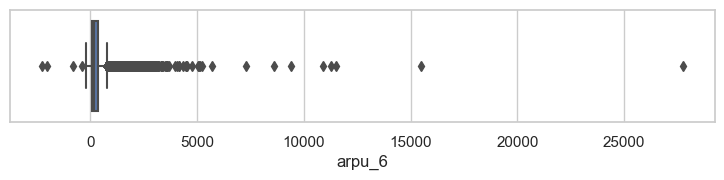

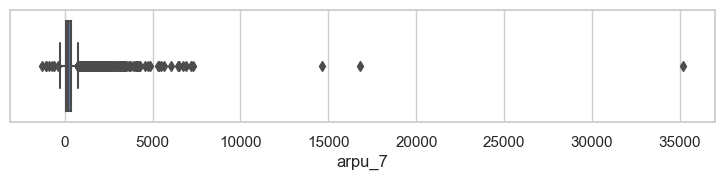

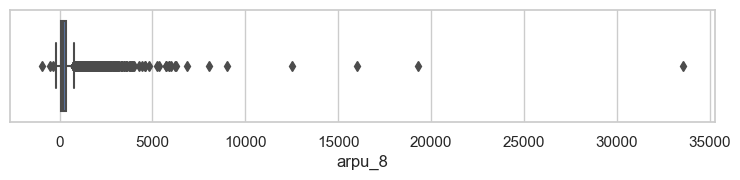

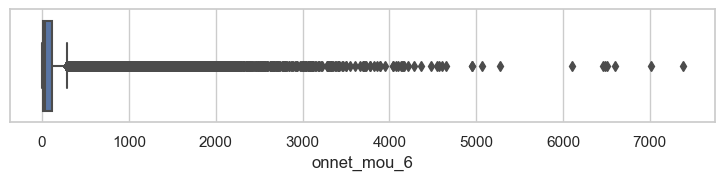

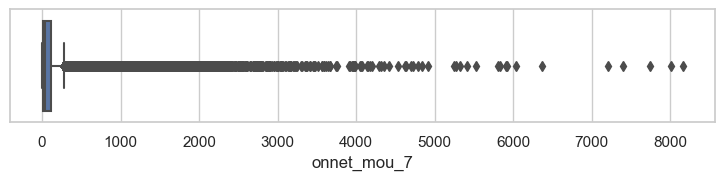

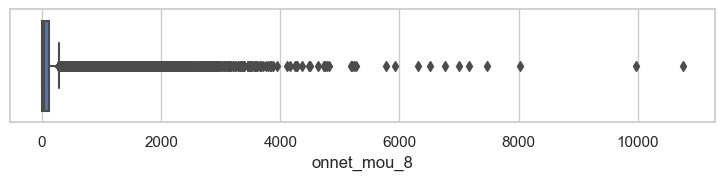

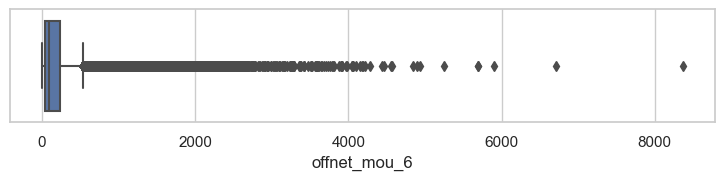

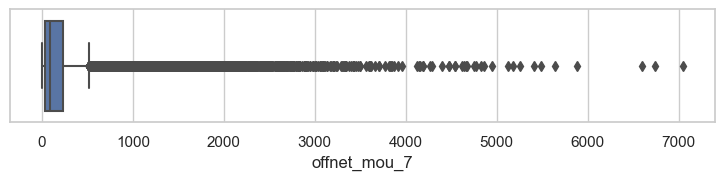

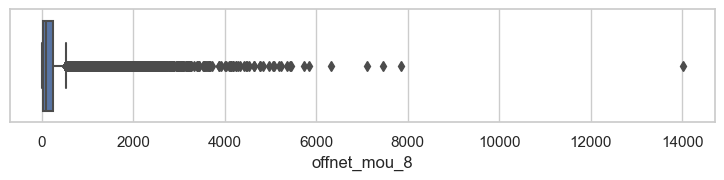

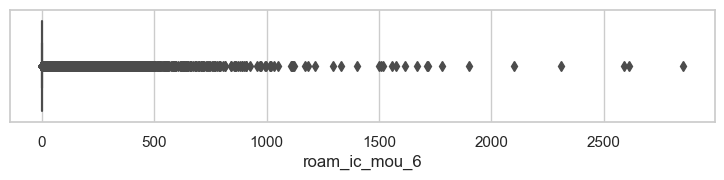

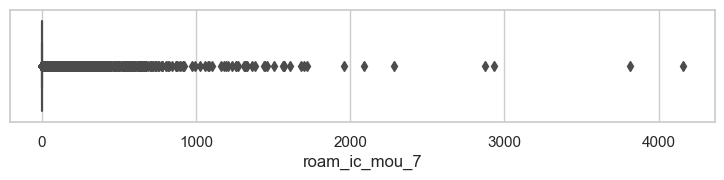

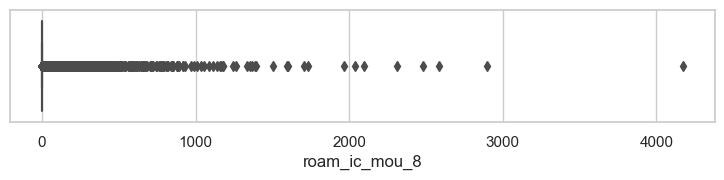

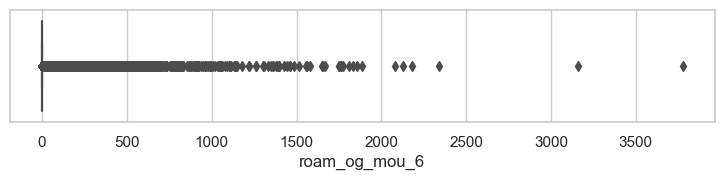

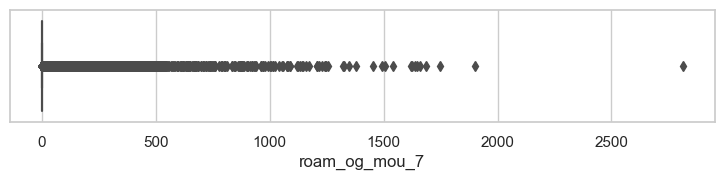

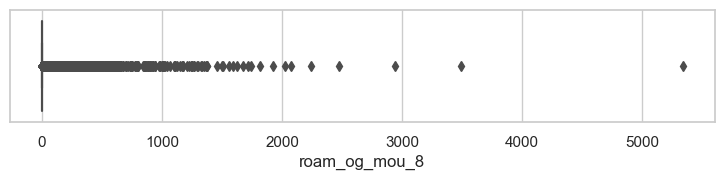

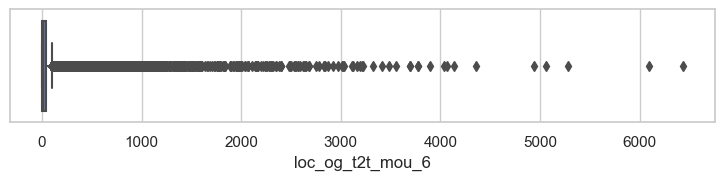

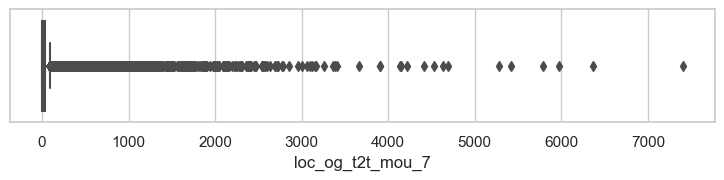

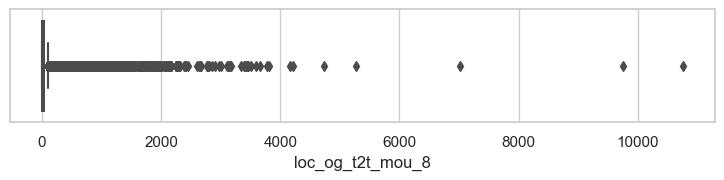

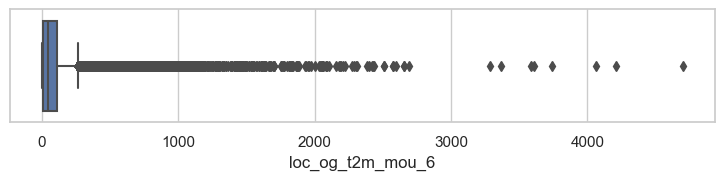

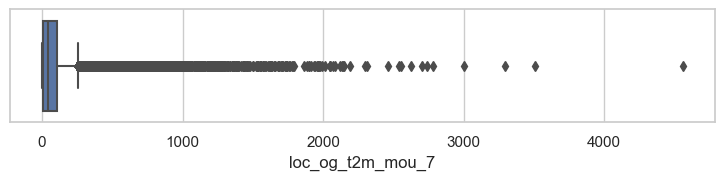

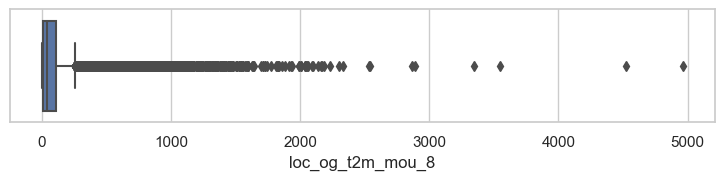

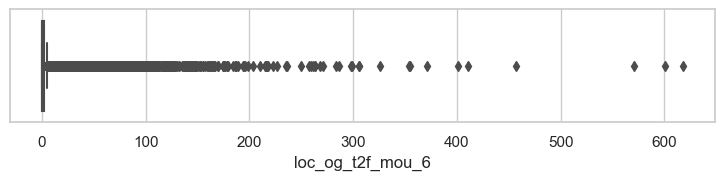

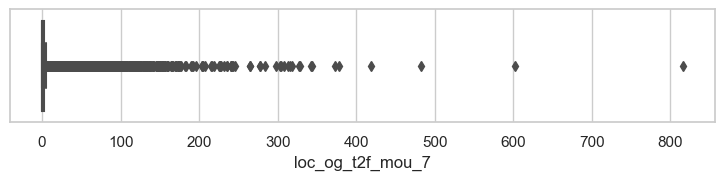

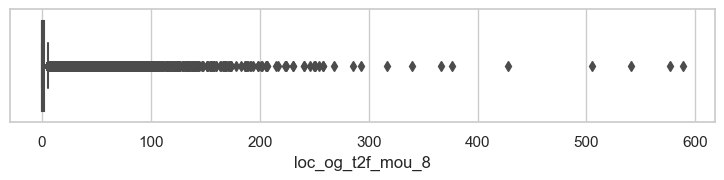

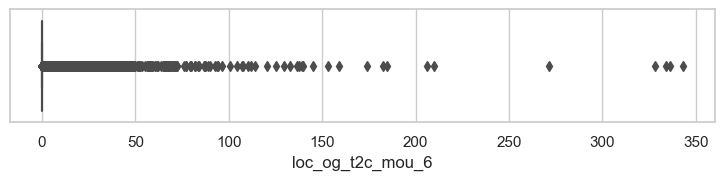

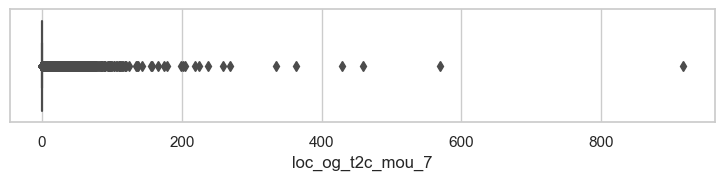

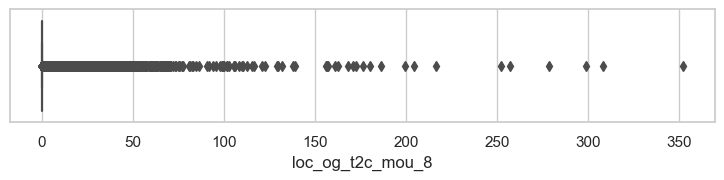

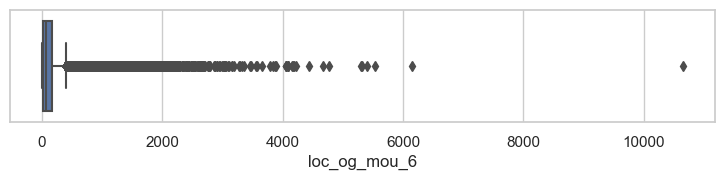

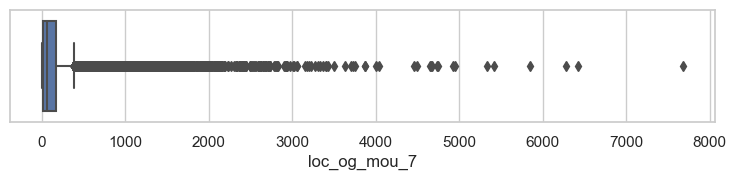

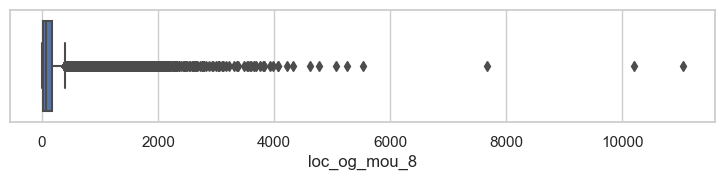

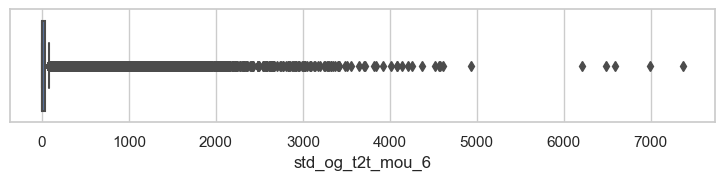

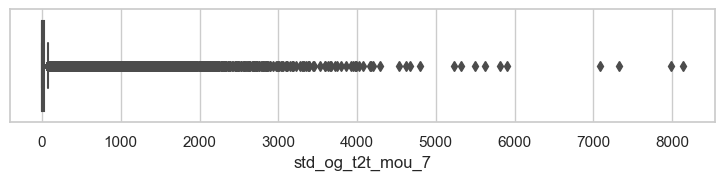

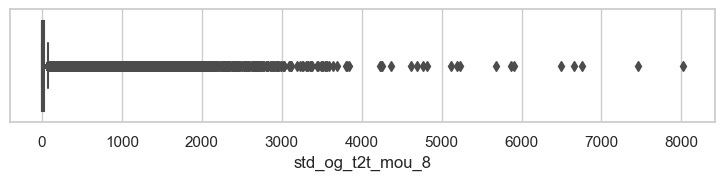

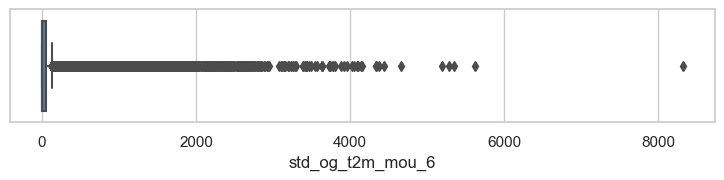

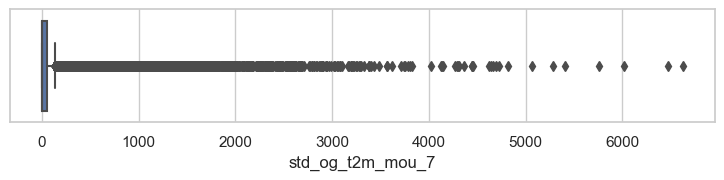

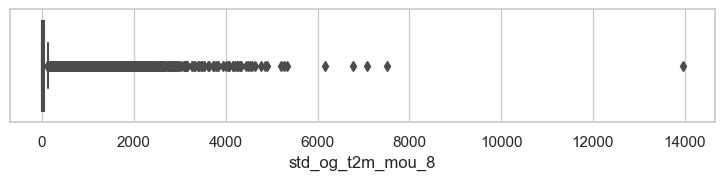

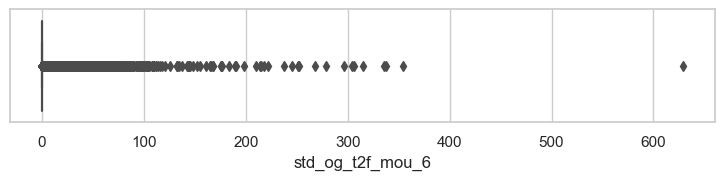

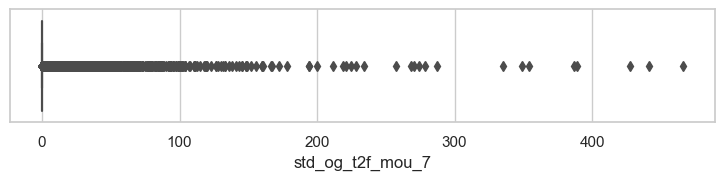

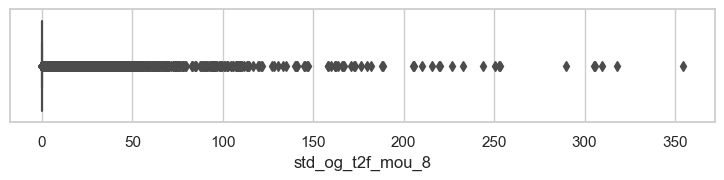

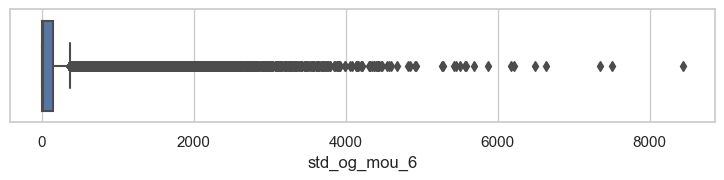

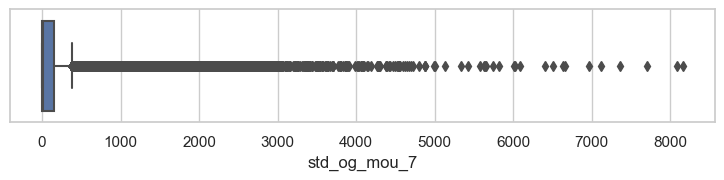

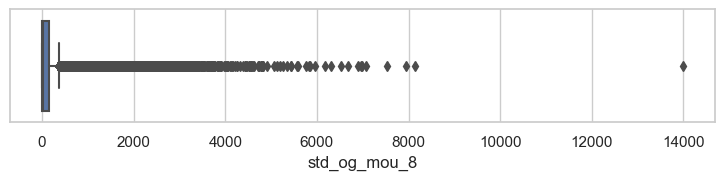

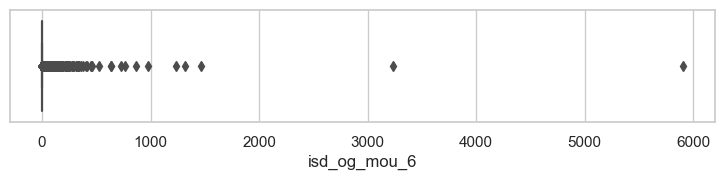

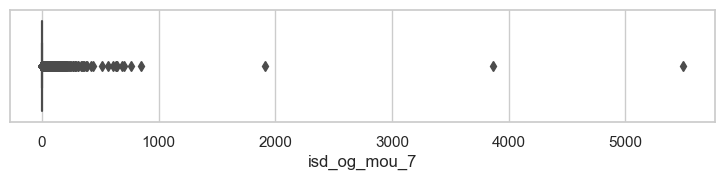

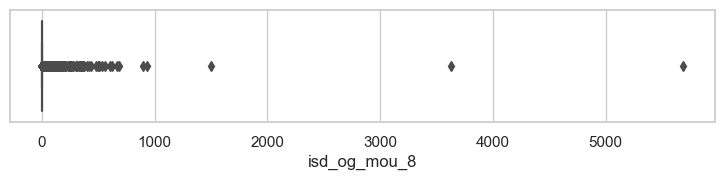

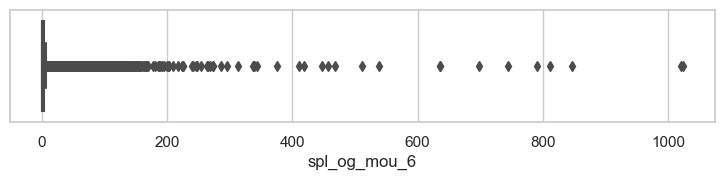

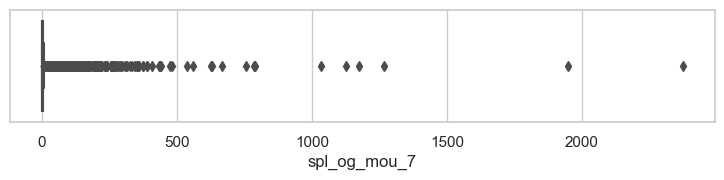

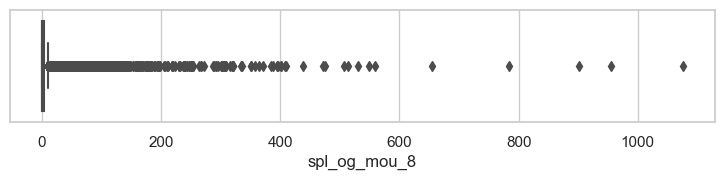

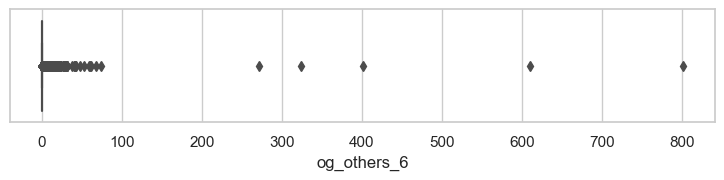

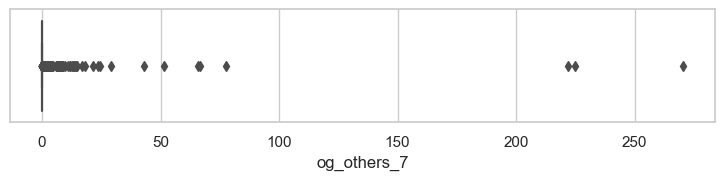

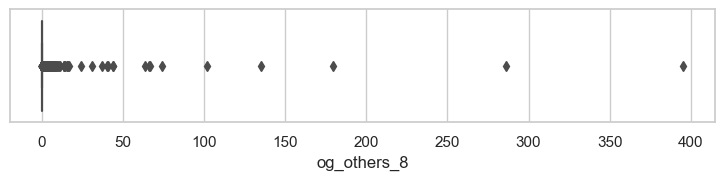

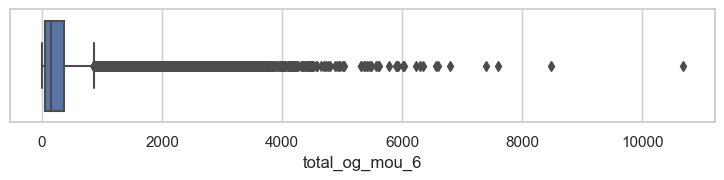

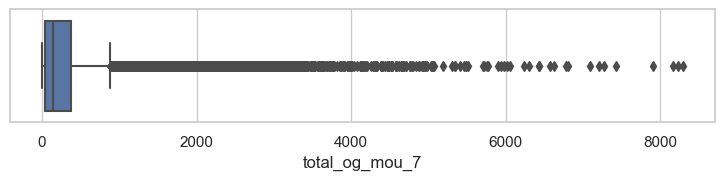

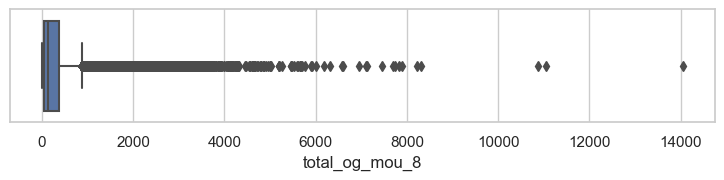

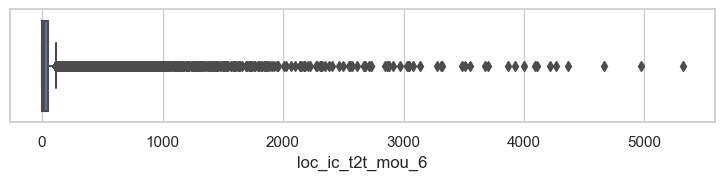

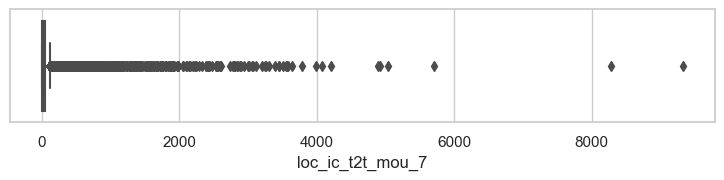

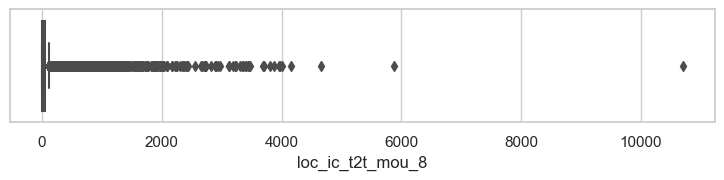

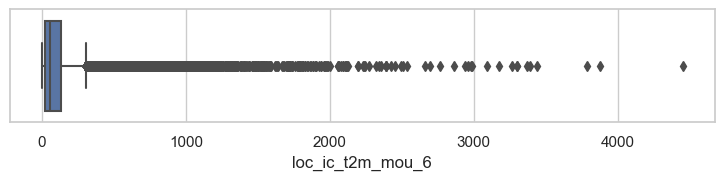

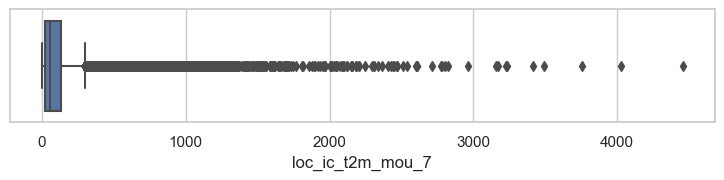

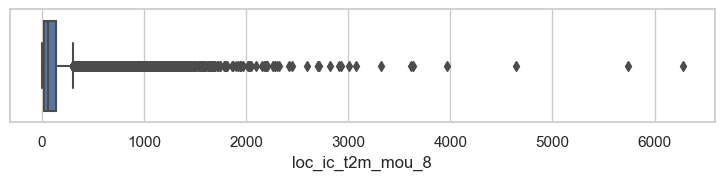

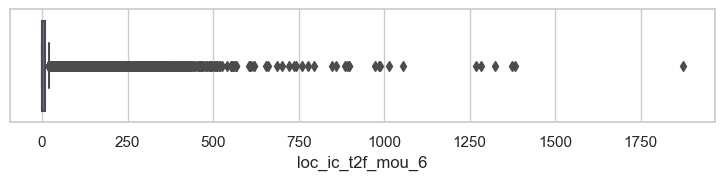

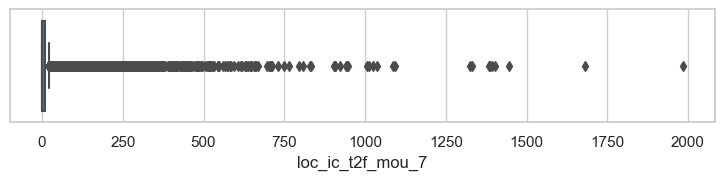

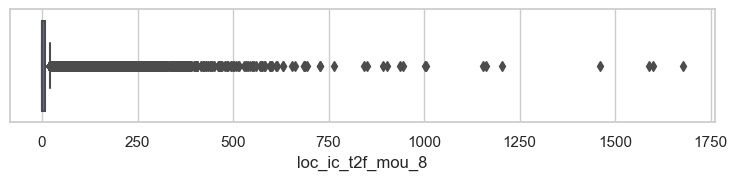

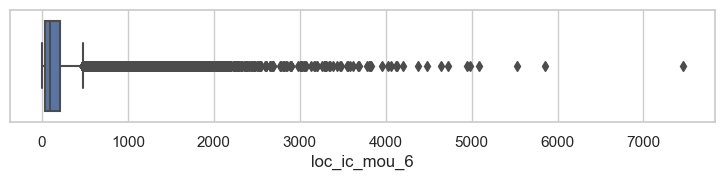

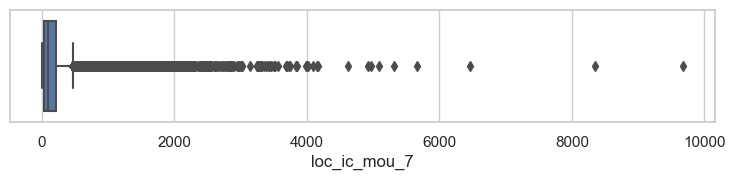

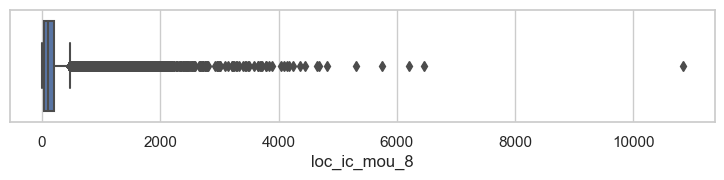

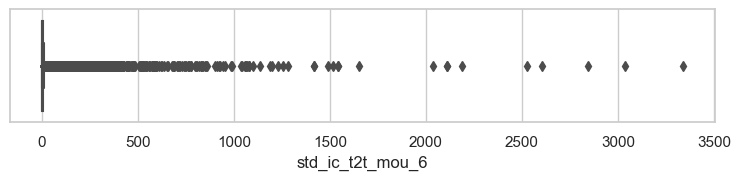

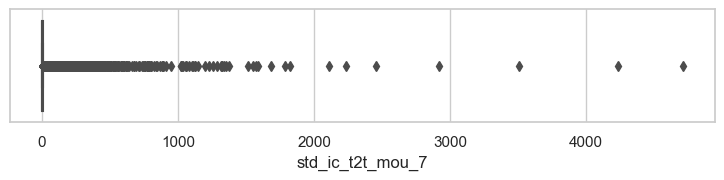

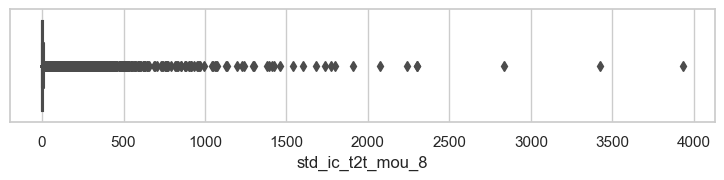

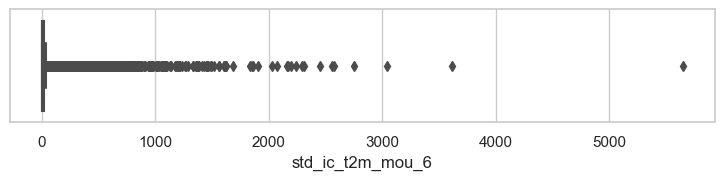

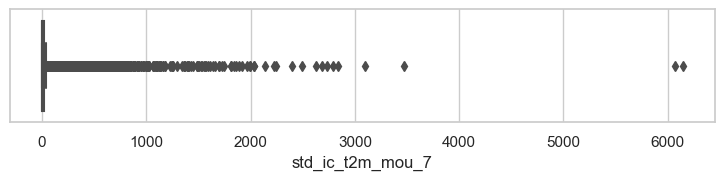

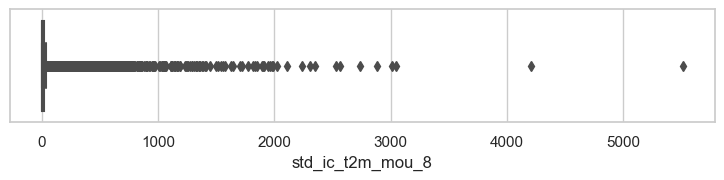

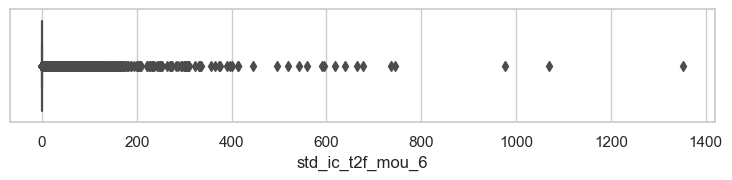

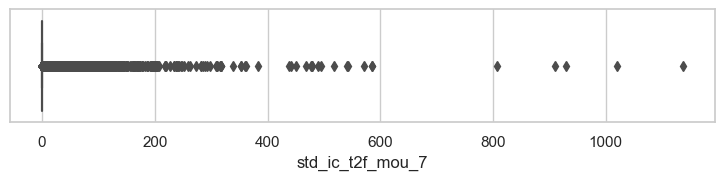

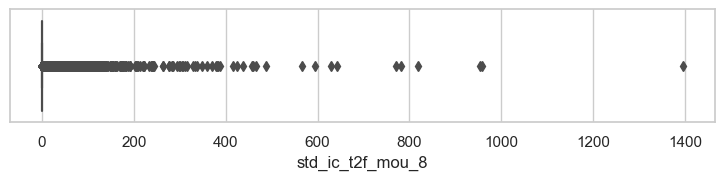

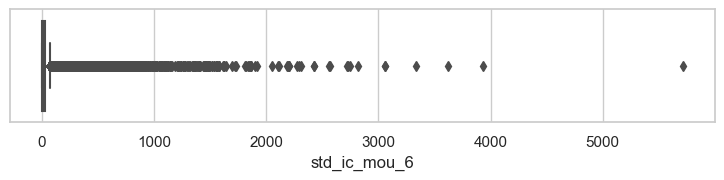

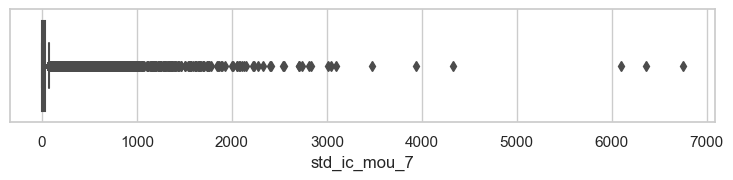

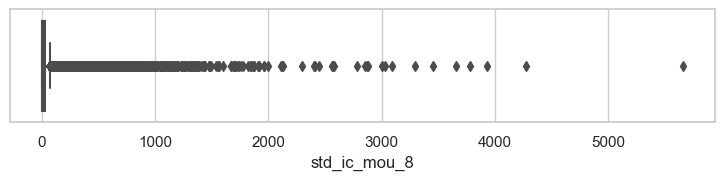

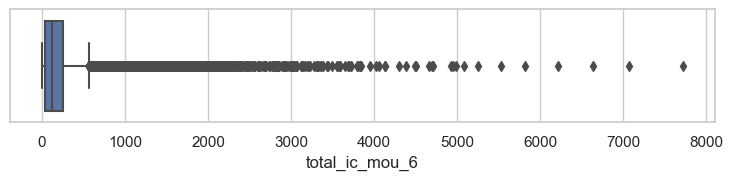

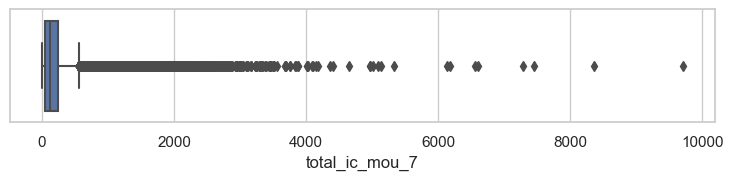

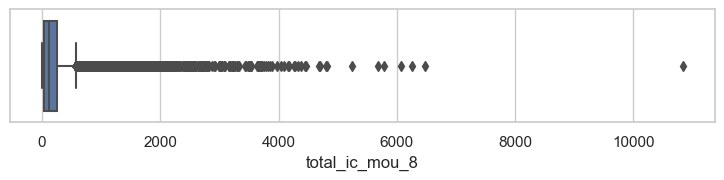

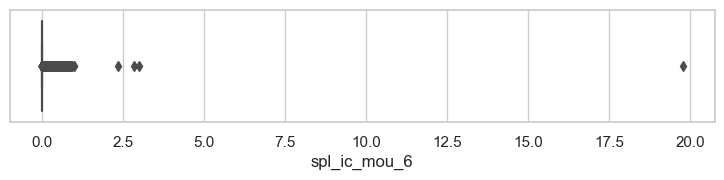

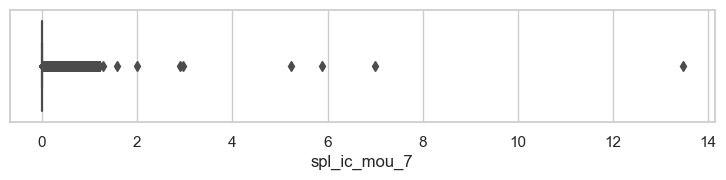

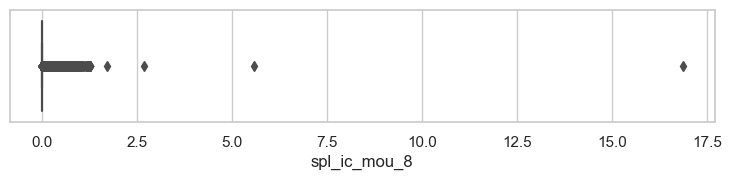

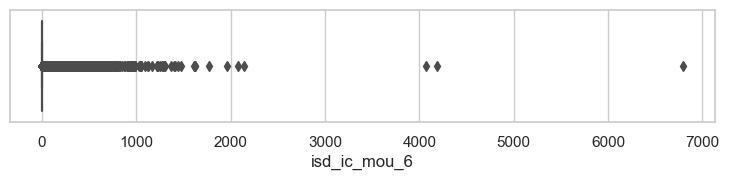

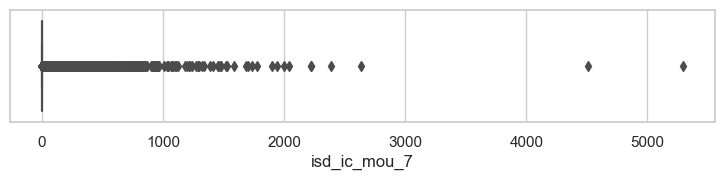

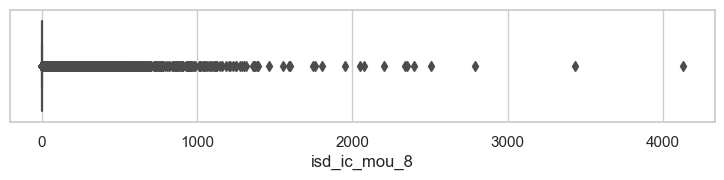

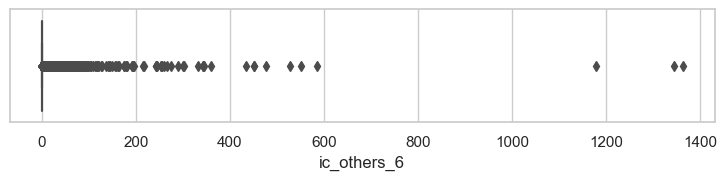

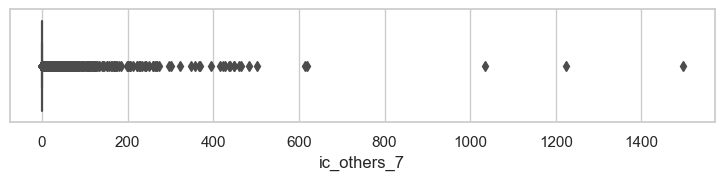

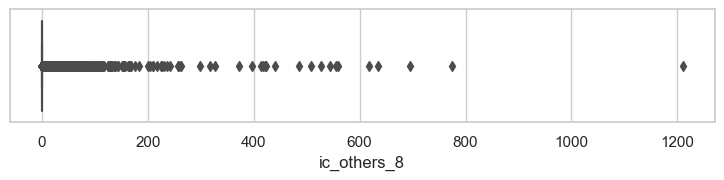

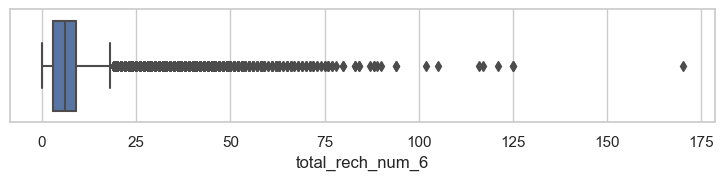

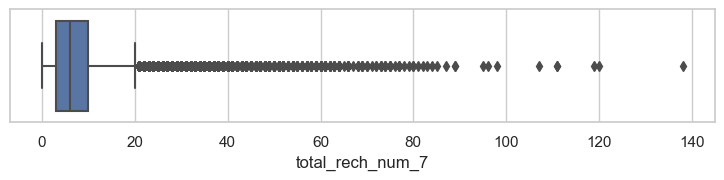

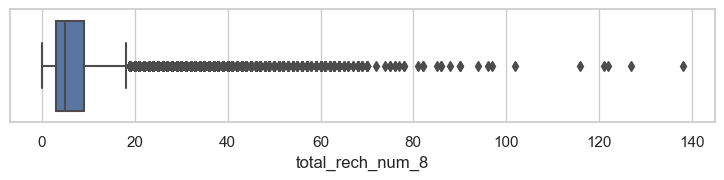

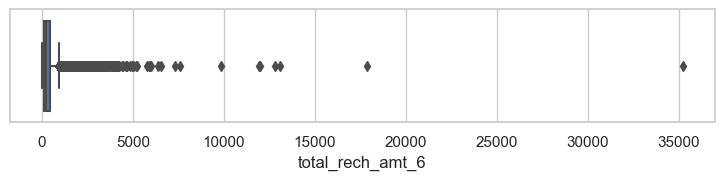

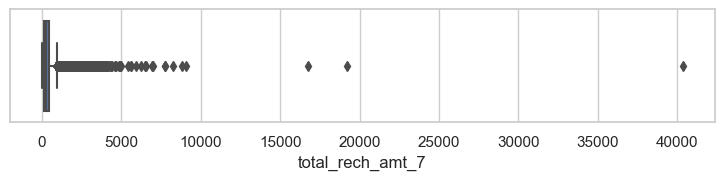

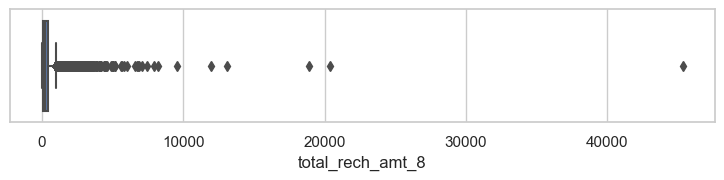

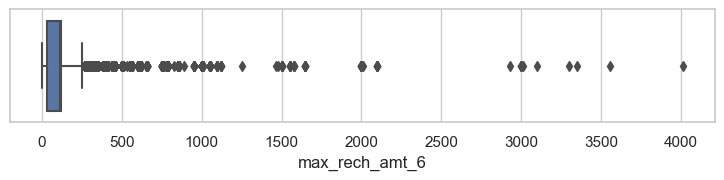

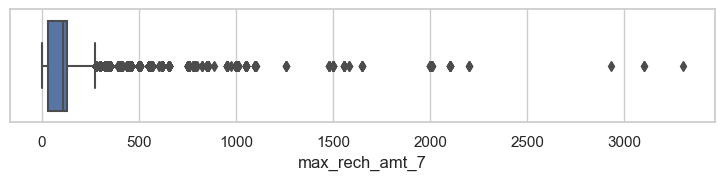

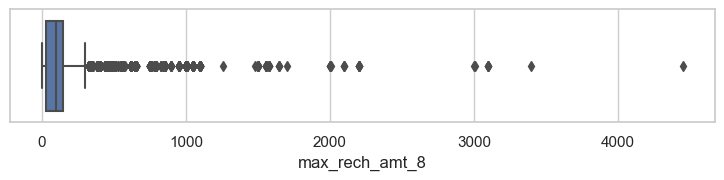

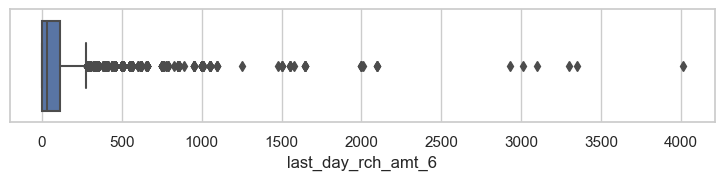

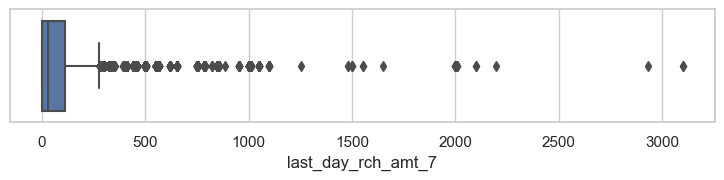

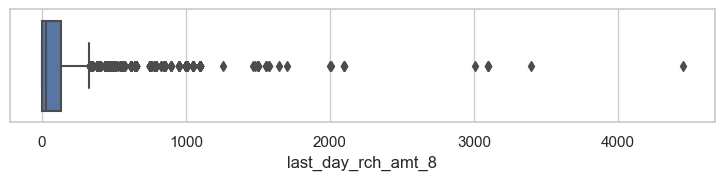

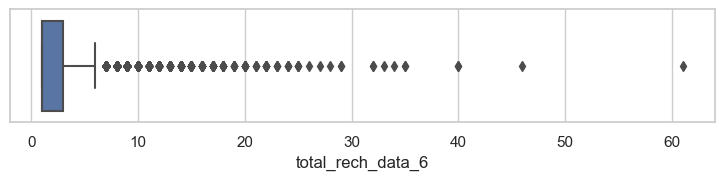

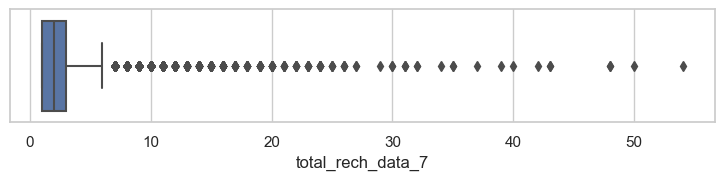

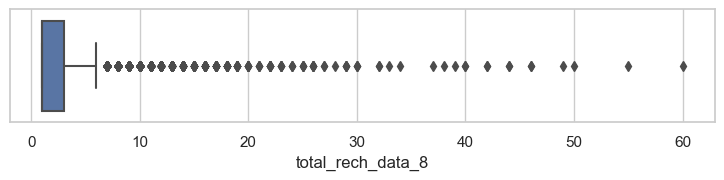

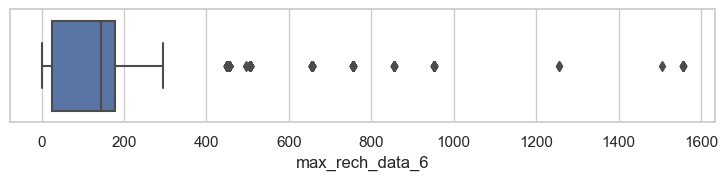

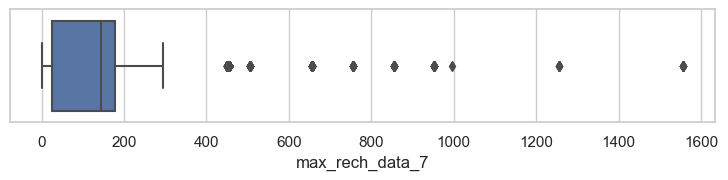

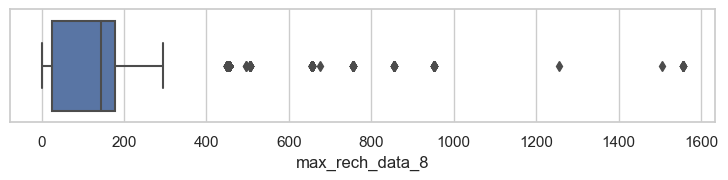

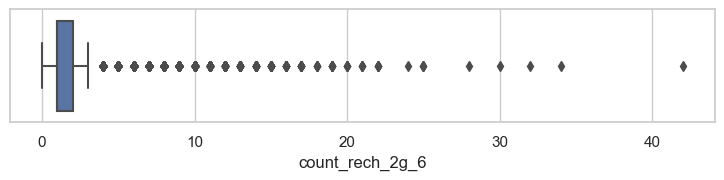

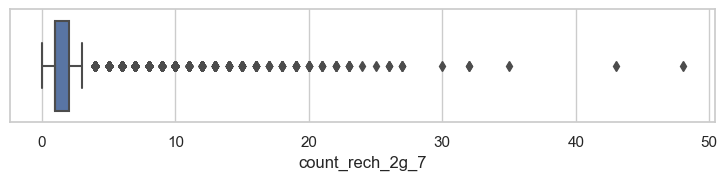

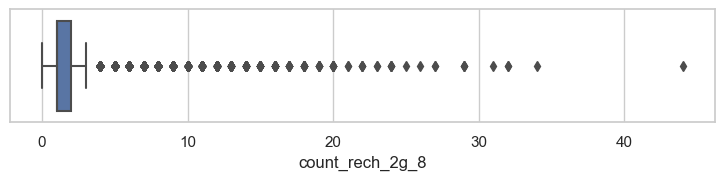

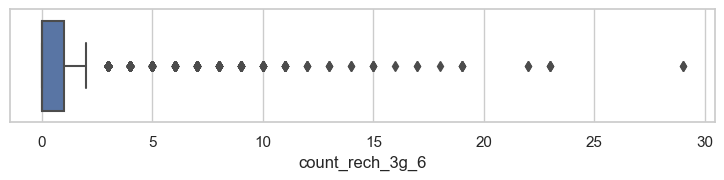

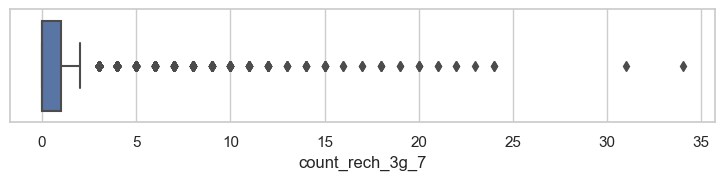

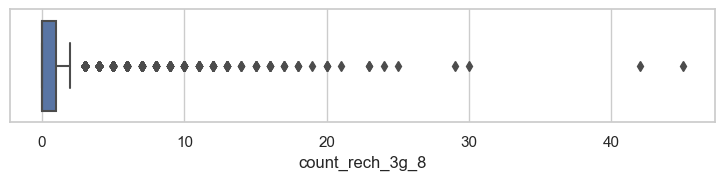

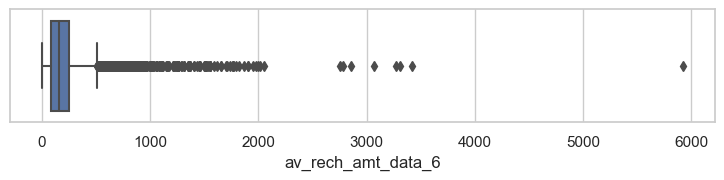

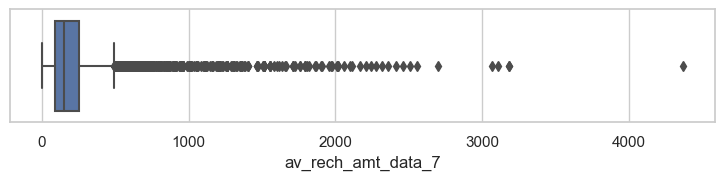

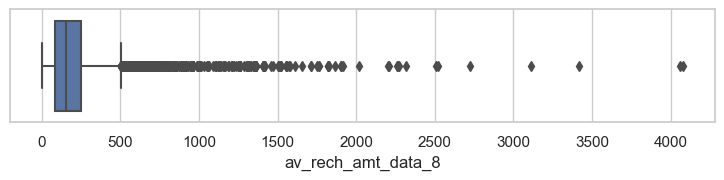

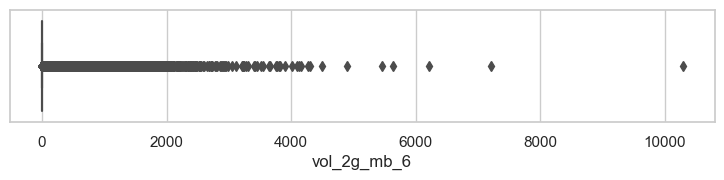

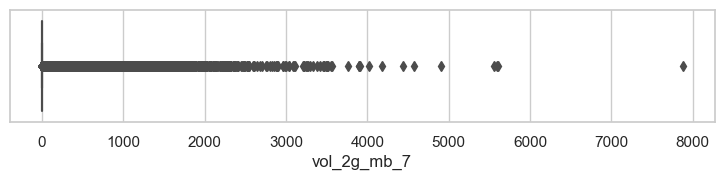

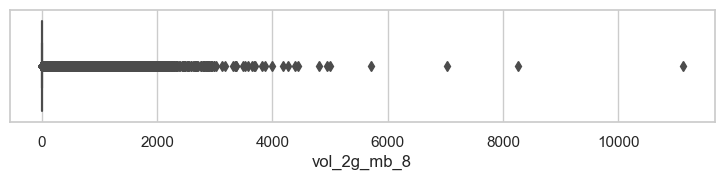

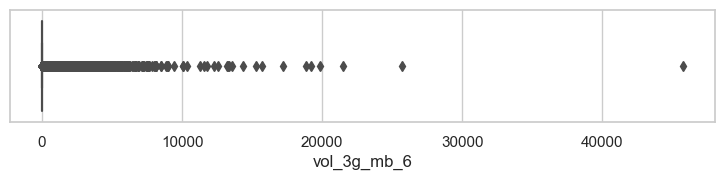

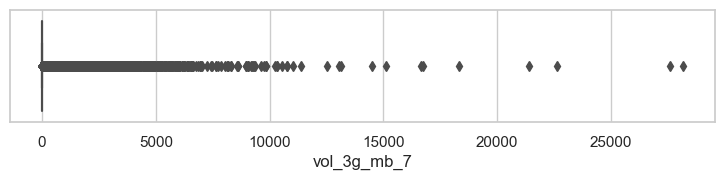

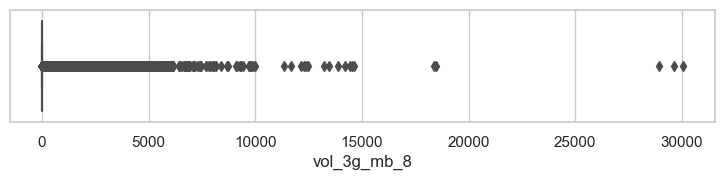

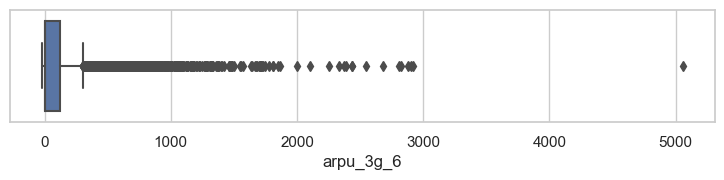

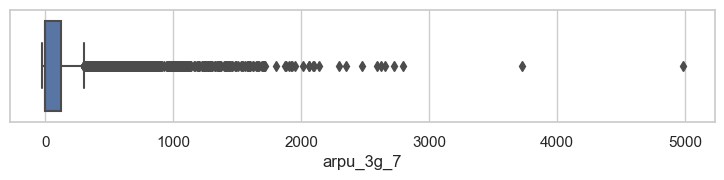

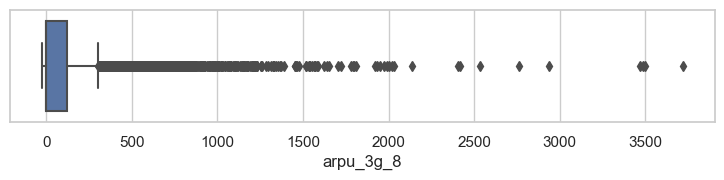

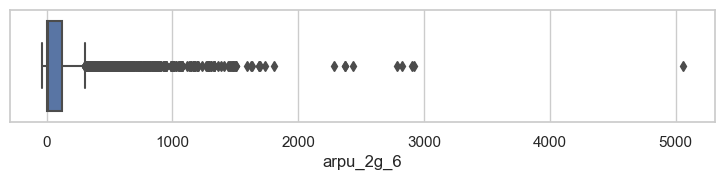

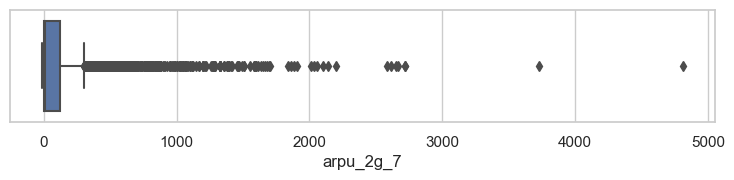

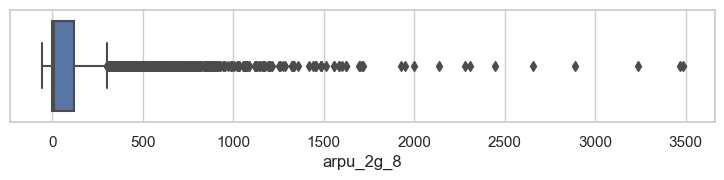

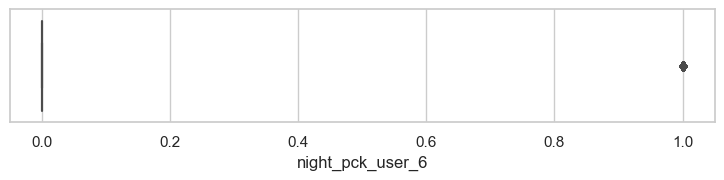

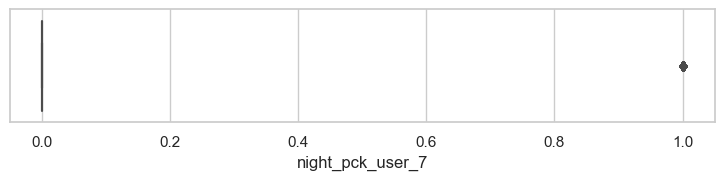

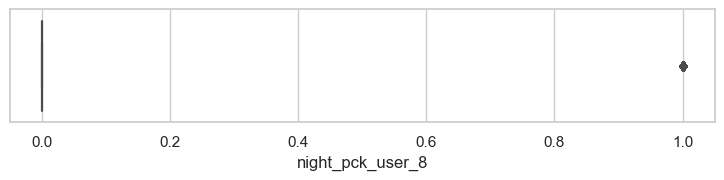

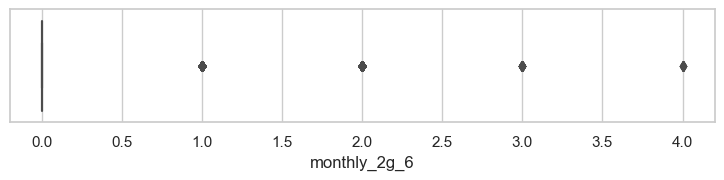

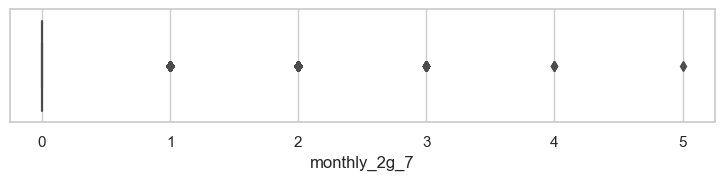

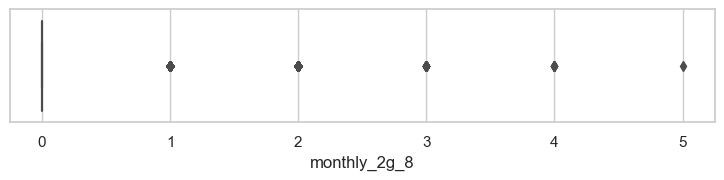

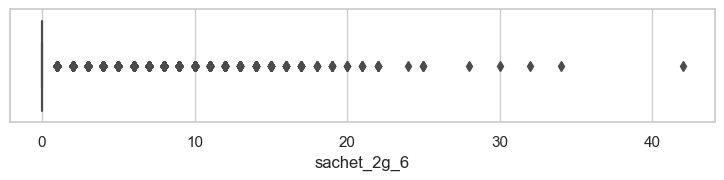

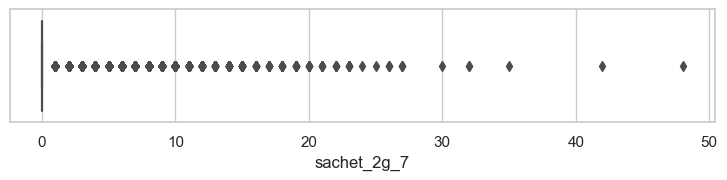

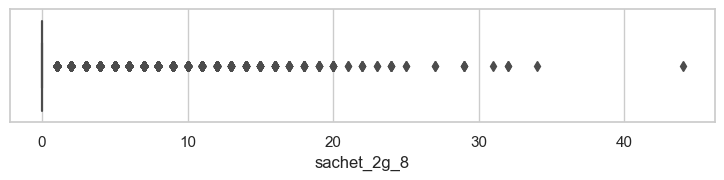

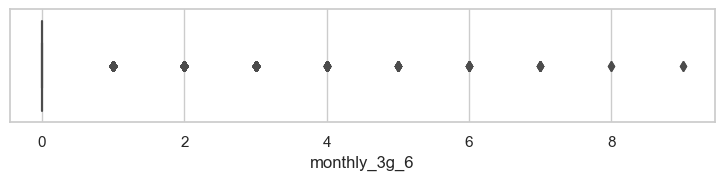

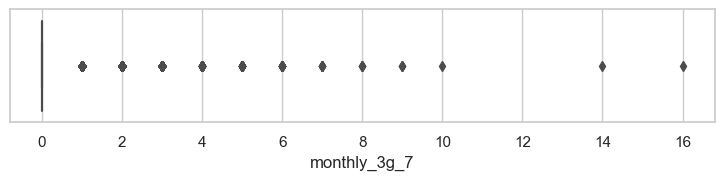

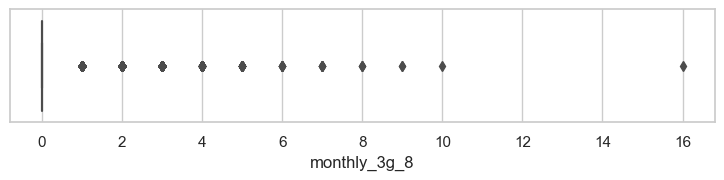

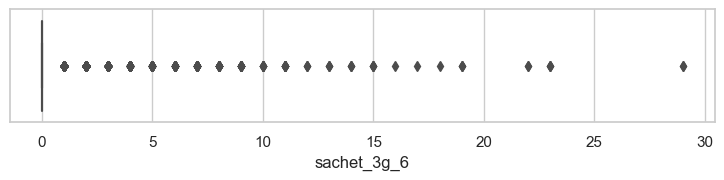

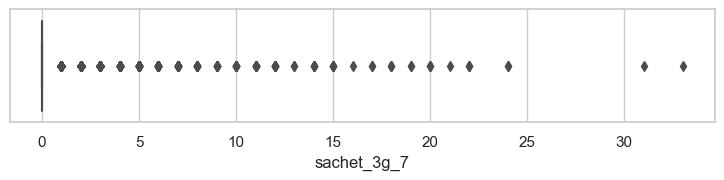

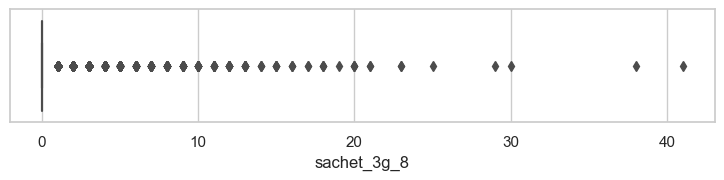

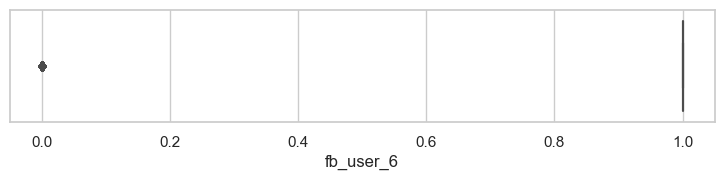

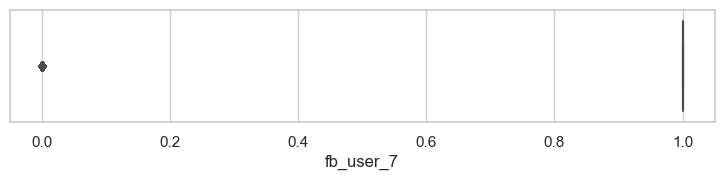

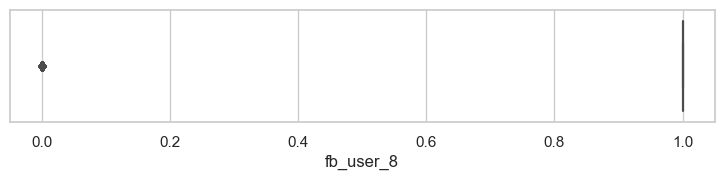

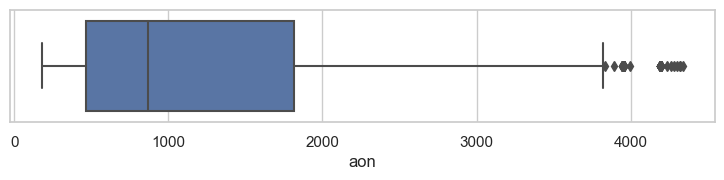

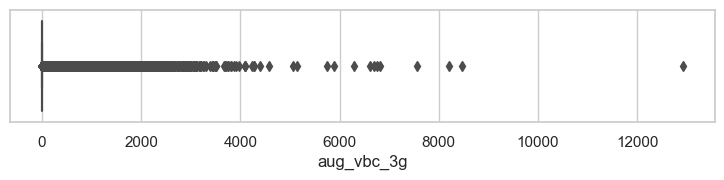

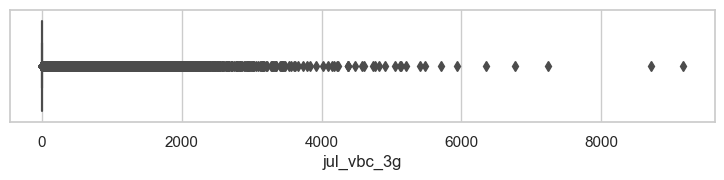

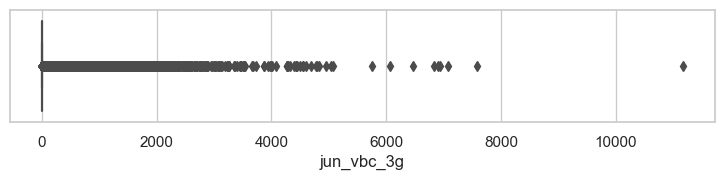

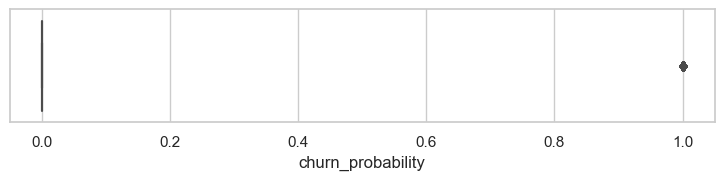

In [28]:
k=churn_train.shape[1]
j=int(k/3)

for i,col in enumerate(churn_train.describe().columns):
    plt.figure(figsize=(20, 140))
    plt.subplot(80,2,i+1)
    sns.boxplot(data=churn_train,x=col)
plt.show()

INFERENCES
there are some outliers in each numerical ncolums 

CATEGORICAL VARIABLES

In [29]:
catcols=[ i for i in churn_train.columns if churn_train[i].dtype not in ["int64", "float64"] ]
len(catcols)

9

HISTOGRAMS OF CATEGORICAL VARIABLES

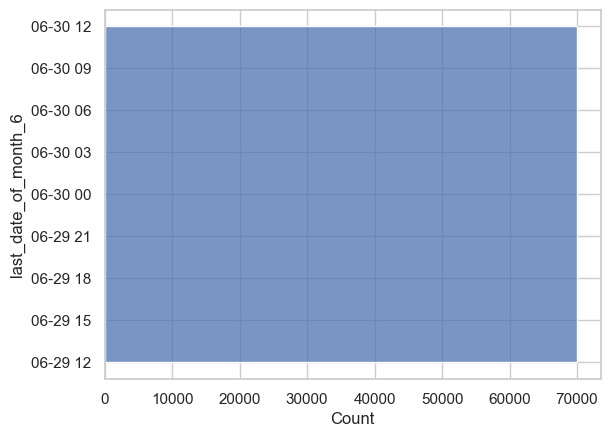

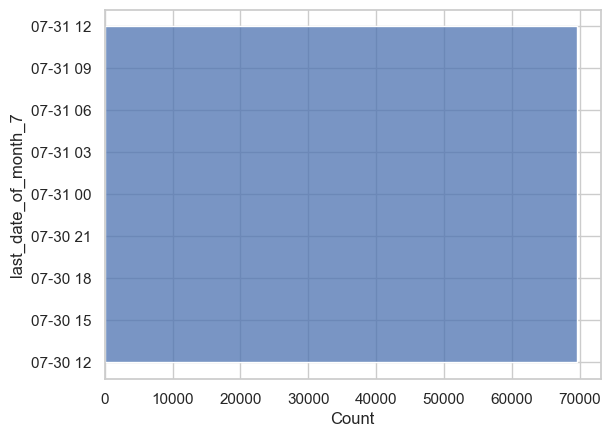

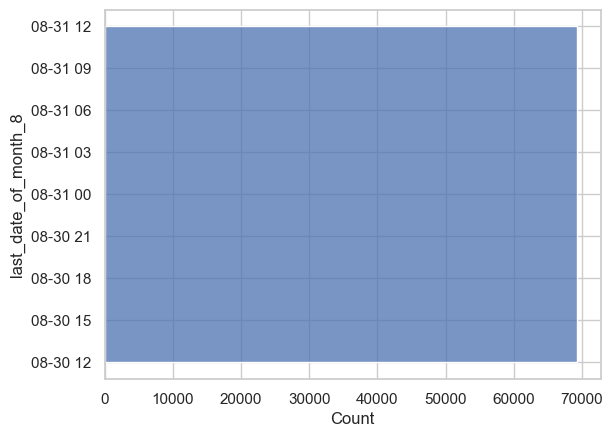

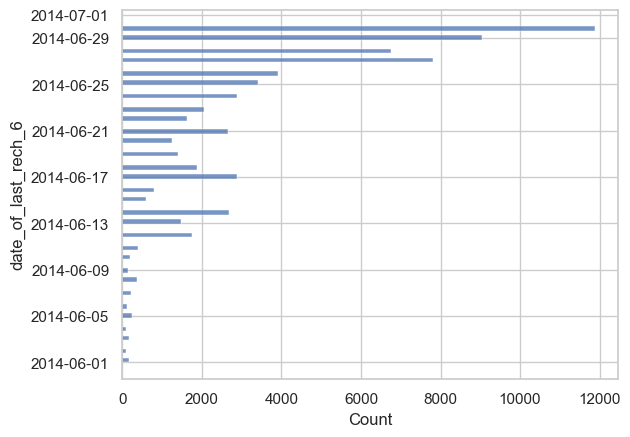

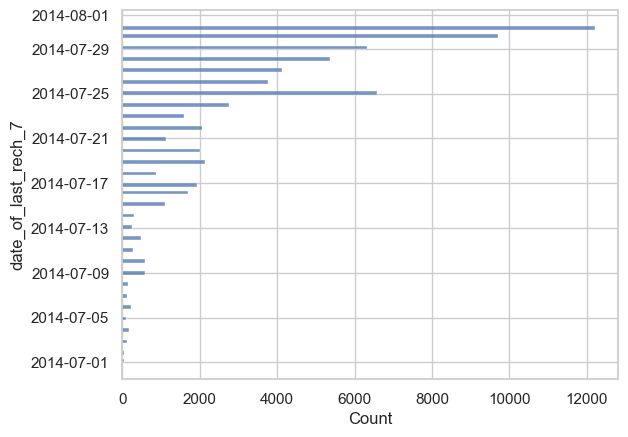

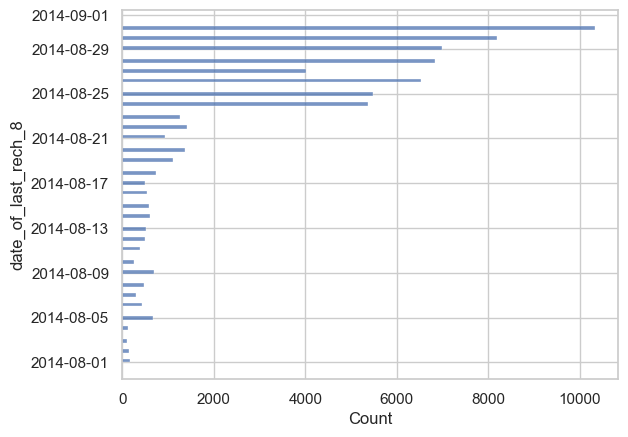

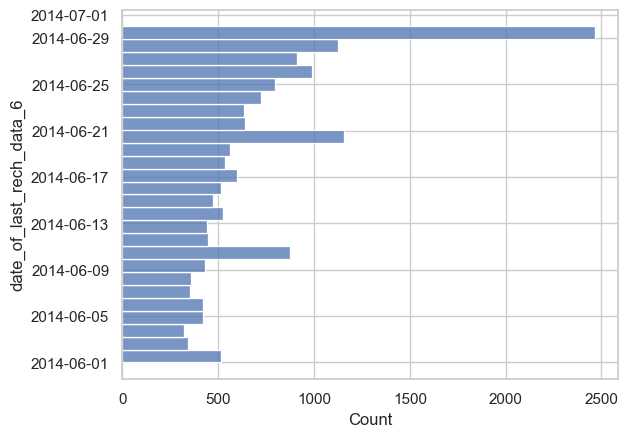

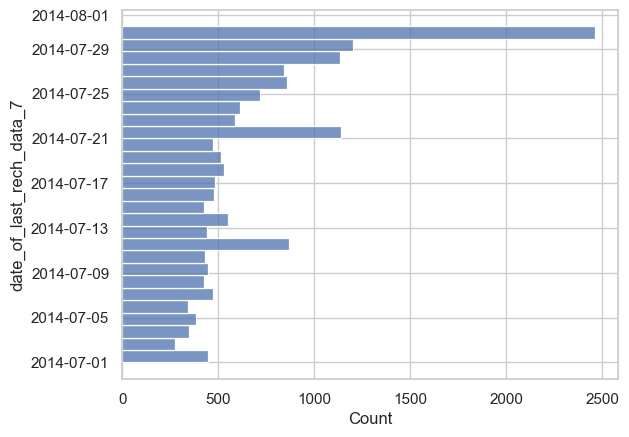

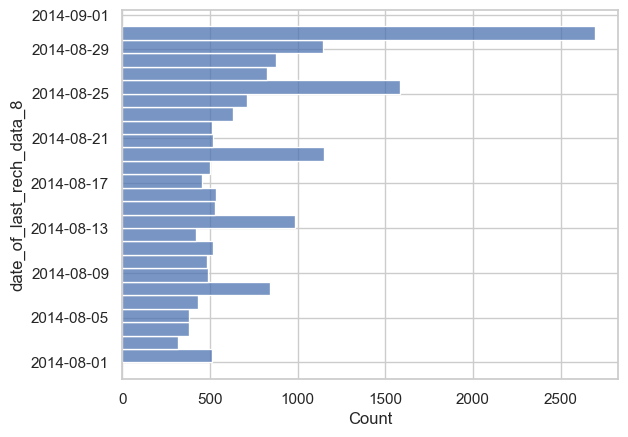

In [30]:
for i in catcols:
    plt.figure(i)
    sns.histplot(data=churn_train,y=i)

BIVARIATE ANALYSIS

COORELATION MATRIX ANALYSIS

<AxesSubplot: >

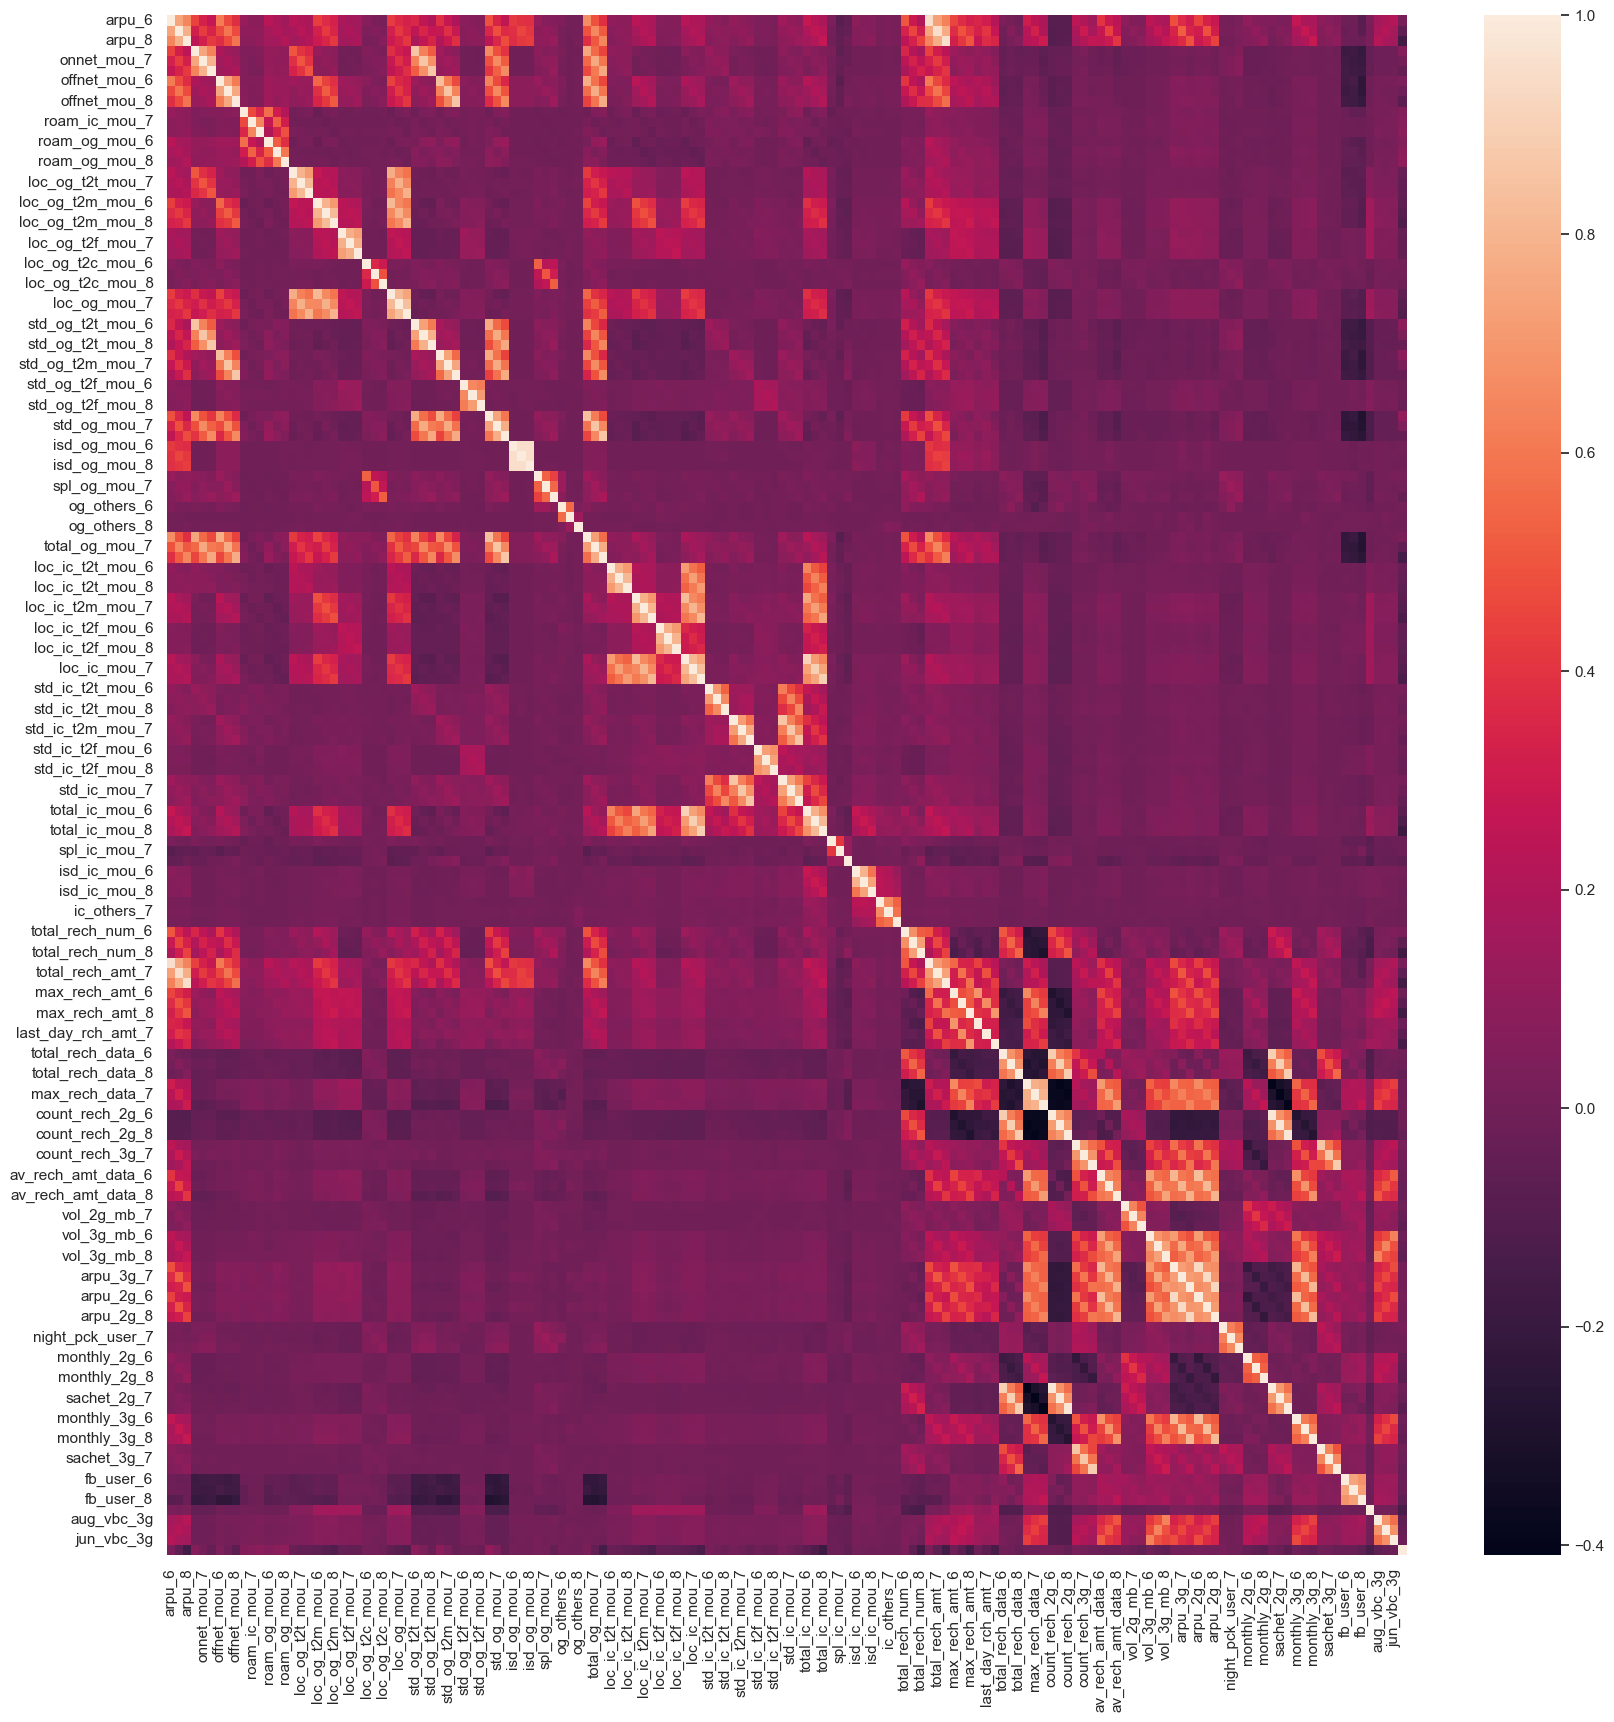

In [31]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(churn_train.corr())

SPECIFIC LOOK AT CHURN PROBABILITY COLUMN

In [32]:
pd.set_option("display.max_rows", 200)
churn_train.corr()['churn_probability'].sort_values()

total_ic_mou_8                      -0.19
total_rech_num_8                    -0.17
total_rech_amt_8                    -0.16
max_rech_amt_8                      -0.16
arpu_8                              -0.16
total_og_mou_8                      -0.15
last_day_rch_amt_8                  -0.14
aon                                 -0.14
loc_ic_mou_8                        -0.13
loc_ic_t2m_mou_8                    -0.12
total_ic_mou_7                      -0.12
loc_og_t2m_mou_8                    -0.11
loc_og_mou_8                        -0.11
loc_ic_t2m_mou_7                    -0.10
loc_ic_mou_7                        -0.10
loc_og_t2m_mou_7                    -0.09
loc_og_mou_7                        -0.09
monthly_2g_8                        -0.08
max_rech_amt_7                      -0.07
offnet_mou_8                        -0.07
sachet_2g_8                         -0.07
total_ic_mou_6                      -0.07
loc_ic_mou_6                        -0.07
last_day_rch_amt_7                

INFERENCES


OTHER HIGH COORELATION COLUMNS (+ CORELATION)
roam_ic_mou_7                        0.07
std_og_t2m_mou_6                     0.08
std_og_t2t_mou_6                     0.08
roam_ic_mou_8                        0.09
roam_og_mou_7                        0.09
roam_og_mou_8                        0.10
std_og_mou_6                         0.11

OTHER HIGH COORELATION COLUMNS (- CORELATION)

total_ic_mou_8                      -0.19
total_rech_num_8                    -0.17
total_rech_amt_8                    -0.16
max_rech_amt_8                      -0.16
arpu_8                              -0.16
total_og_mou_8                      -0.15
last_day_rch_amt_8                  -0.14
aon                                 -0.14
loc_ic_mou_8                        -0.13
loc_ic_t2m_mou_8                    -0.12
total_ic_mou_7                      -0.12
loc_og_t2m_mou_8                    -0.11
loc_og_mou_8                        -0.11
loc_ic_t2m_mou_7                    -0.10
loc_ic_mou_7                        -0.10
loc_og_t2m_mou_7                    -0.09
loc_og_mou_7                        -0.09
monthly_2g_8                        -0.08
max_rech_amt_7                      -0.07
offnet_mou_8                        -0.07
sachet_2g_8                         -0.07
total_ic_mou_6                      -0.07
loc_ic_mou_6                        -0.07
last_day_rch_amt_7                  -0.07
loc_ic_t2m_mou_6                    -0.07

LETS HAVE A TWEAK ON HIBH COOREALTION COLUMNS

+ COOREALTION 0.7 TO 1
- COORELATION -0.5 TO -1

In [33]:
k=churn_train.corr()
k=k[((k>.7) & (k<1)) | ((k<-.5)&(k>-1))]
k=k.dropna(axis=0,how='all')
k=k.dropna(axis=1,how='all')
k.shape

(108, 108)

FILTERED DATA

<AxesSubplot: >

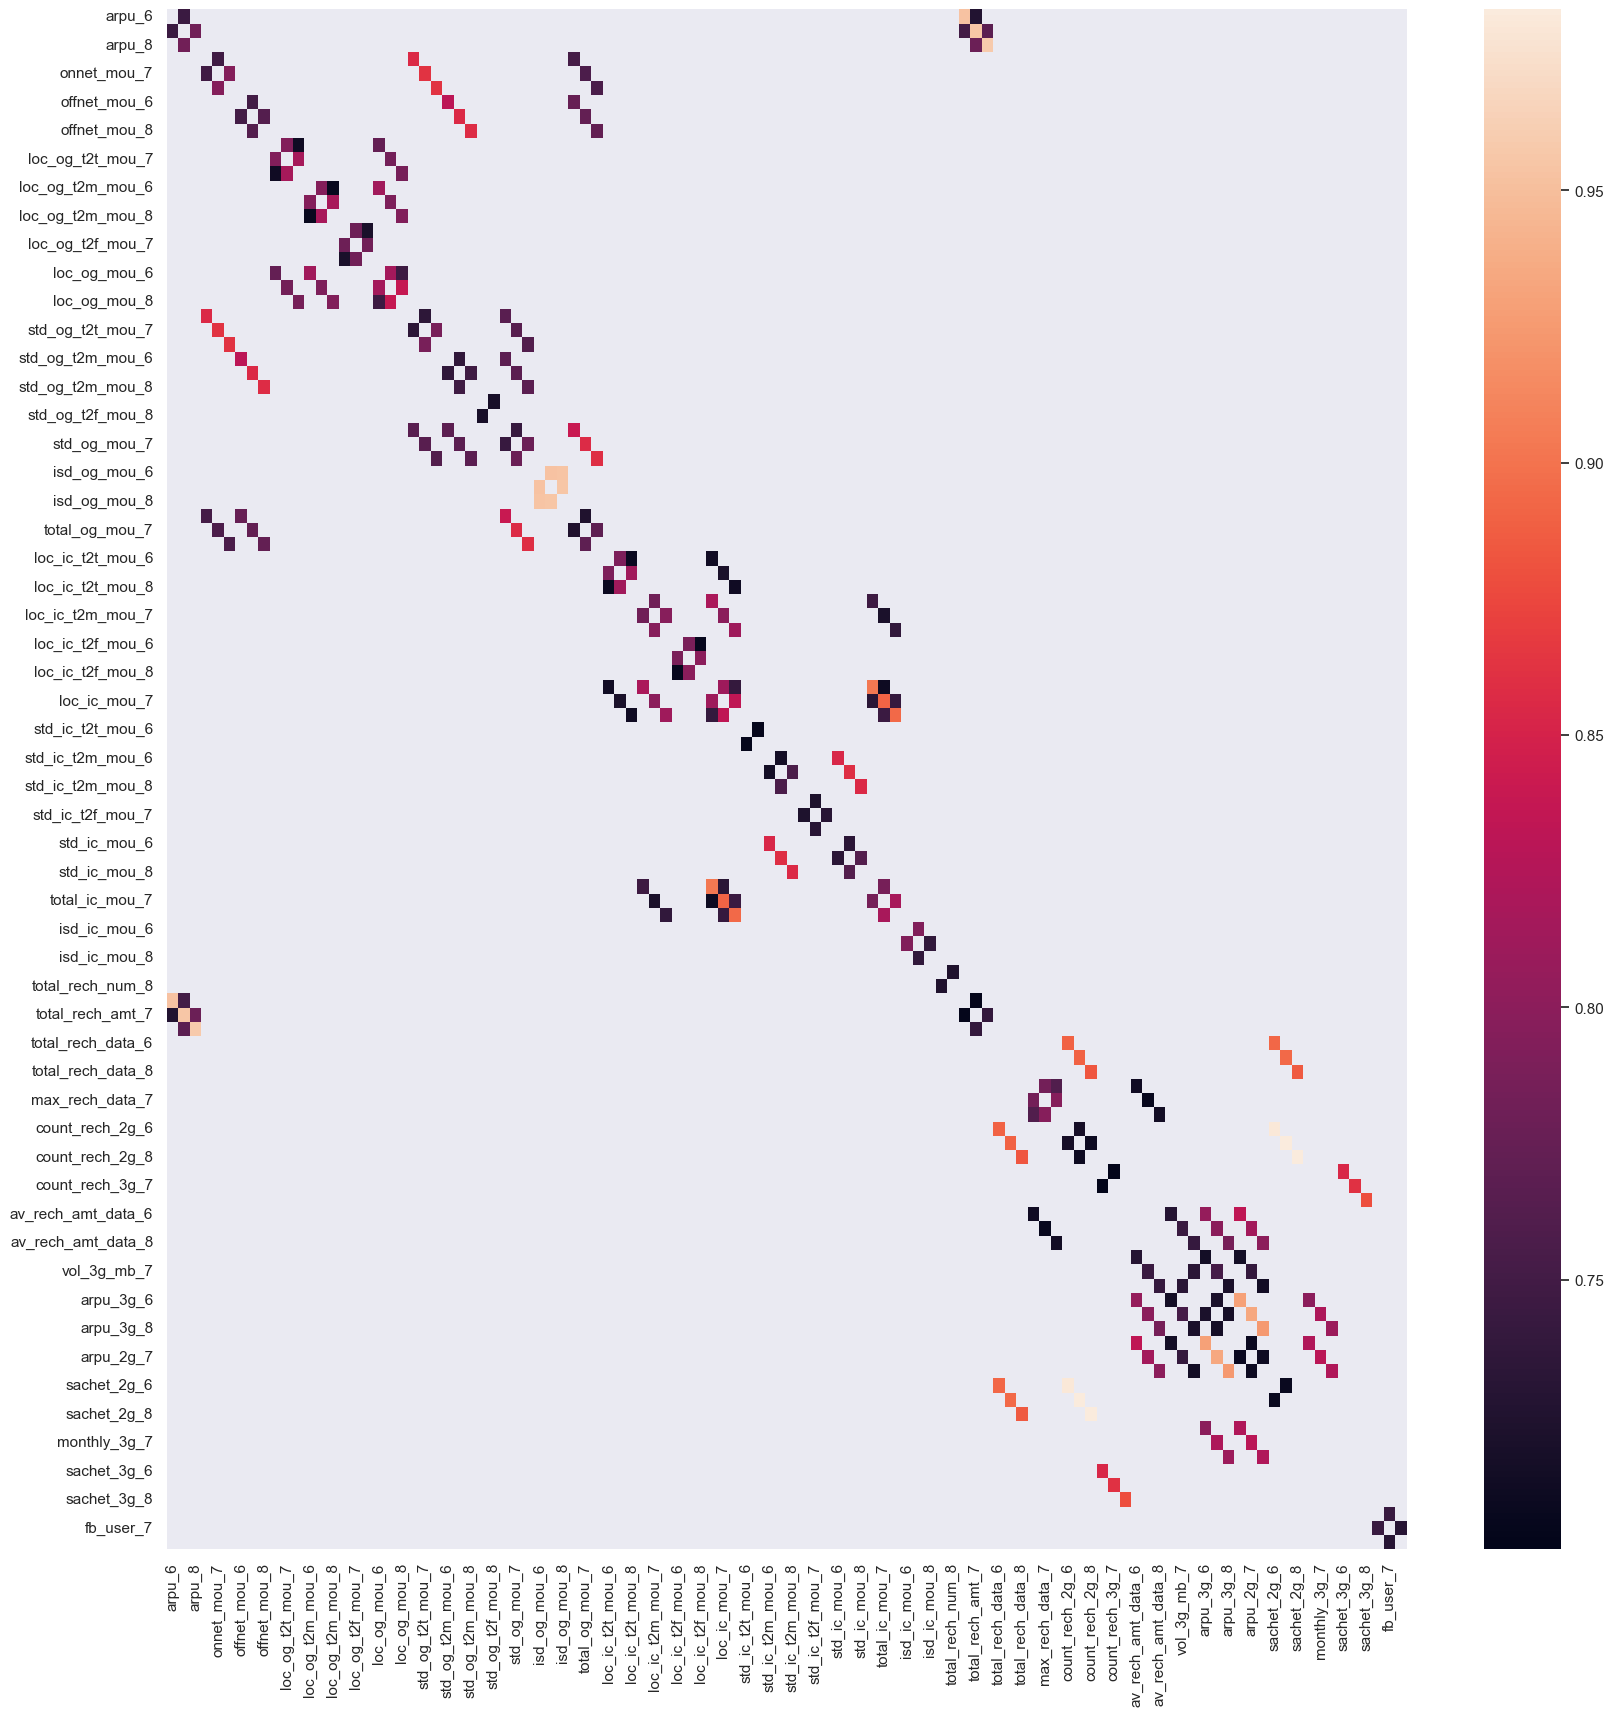

In [34]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(k)

CONVERT aon to months

In [35]:
# lets now conevrt AON in months
churn_train['aon_mon'] =churn_train['aon']/30
churn_test['aon_mon'] = churn_test['aon']/30
churn_train.drop('aon', axis=1, inplace=True)
churn_test.drop('aon', axis=1, inplace=True)
churn_train['aon_mon'].head()

0                  65.27
1                  23.67
2                  29.40
3                  32.73
4                  21.57
Name: aon_mon, dtype: float64

Text(0.5, 1.0, 'Tenure Graph')

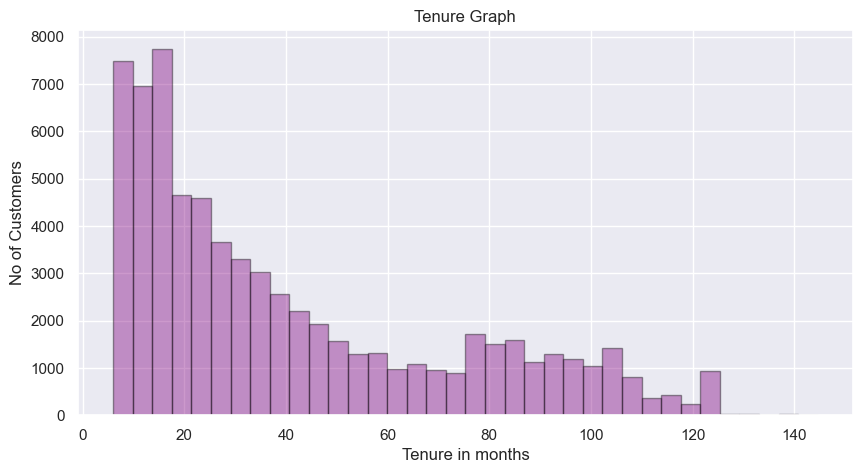

In [36]:
sns.set(rc = {'figure.figsize':(10,5)})
aon = sns.distplot(churn_train['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})
aon.set_ylabel('No of Customers')
aon.set_xlabel('Tenure in months')
aon.set_title('Tenure Graph')

In [37]:
tn_range = [0.0, 6.0, 12.0, 24.0, 60.0, 140.0]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
churn_train['tenure_range'] = pd.cut(churn_train['aon_mon'], tn_range,labels= tn_label)
churn_train['tenure_range'].head()

0    5 Yrs and above
1    1-2 Yrs        
2    2-5 Yrs        
3    2-5 Yrs        
4    1-2 Yrs        
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

<AxesSubplot: >

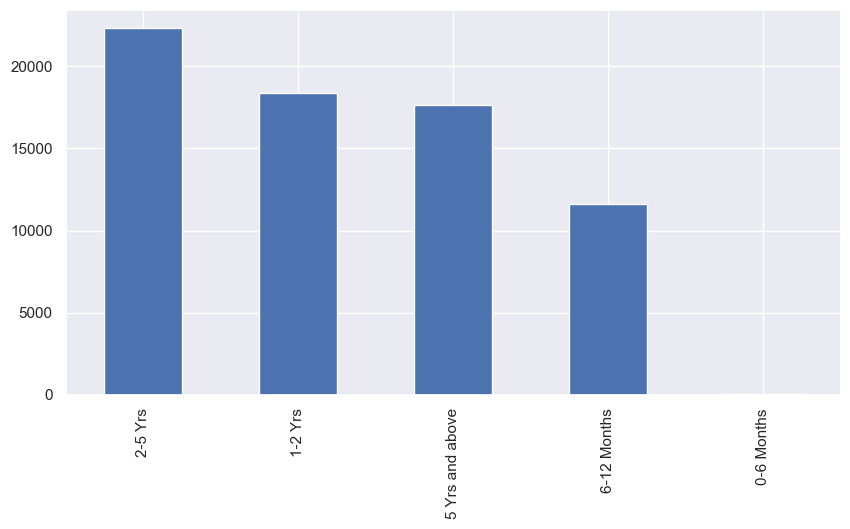

In [38]:
churn_train['tenure_range'].value_counts().plot(kind='bar')

churn versus customer service tanure

<AxesSubplot: xlabel='churn_probability', ylabel='aon_mon'>

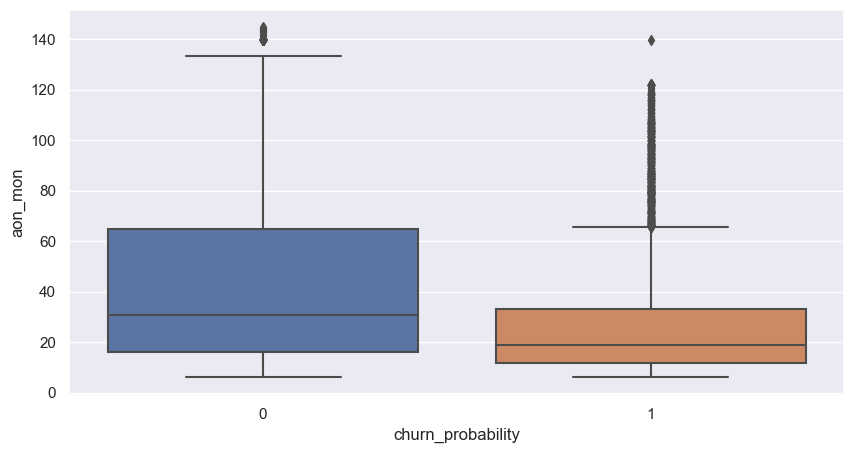

In [39]:
sns.boxplot(x = churn_train.churn_probability, y = churn_train.aon_mon)

CUSTOMER CHURNING RATES

<AxesSubplot: xlabel='churn_probability', ylabel='count'>

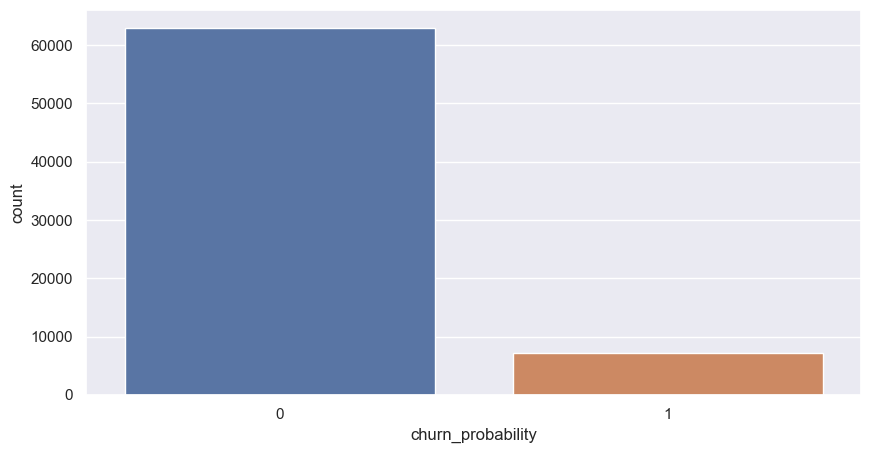

In [40]:
sns.countplot(data=churn_train,x='churn_probability')

# STEP3
Feature Engineering and Variable Transformation :
Feature engineering and performing one or more methods on attributes that can lead to the creation of a new potentially useful variable; for e.g., day from the date
Variable transformation and applying categorical variable transformations to turn into numerical data and numerical variable transformations to scale data

In [41]:
pd.set_option("display.max_columns", 200)
churn_train.head(1)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,aon_mon,tenure_range
0,2014-06-30,2014-07-31,2014-08-31,31.28,87.01,7.53,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.00,0.00,65.09,204.99,1.01,0.00,0.00,0.00,8.20,0.63,0.00,0.38,0.00,0.00,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.00,0.00,0.00,7.46,27.58,15.18,11.84,53.04,40.56,0.00,0.00,0.66,0.00,0.00,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,2014-06-22,2014-07-10,2014-08-24,65,65,0,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0.00,0.00,0.00,0,65.27,5 Yrs and above


drop non calculated columns from test and train datasets

In [42]:
collist=['std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2t_mou_6','std_og_t2t_mou_7',
         'std_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2t_mou_6'
         ,'loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8'
         ,'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7'
         ,'std_ic_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_og_t2c_mou_6'
        ,'loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8'
        ,'std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_og_t2f_mou_6','std_og_t2f_mou_7',
        'std_og_t2f_mou_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7',
        'offnet_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','loc_og_mou_6','loc_og_mou_7',
        'loc_og_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_ic_mou_6','std_ic_mou_7',
         'std_ic_mou_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','isd_ic_mou_6','isd_ic_mou_7',
         'isd_ic_mou_8','ic_others_6','ic_others_7','ic_others_8','spl_og_mou_6','spl_og_mou_7',
         'spl_og_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','og_others_6','og_others_7',
         'og_others_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','std_ic_t2t_mou_6',
         'std_ic_t2t_mou_7','std_ic_t2t_mou_8'
        ]
churn_train.drop(columns=collist,inplace=True)
churn_test.drop(columns=collist,inplace=True)

In [43]:
churn_train.shape

(69999, 87)

In [44]:
churn_test.shape

(30000, 86)

In [45]:
pd.set_option("display.max_columns", 200)
churn_train.head(2)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,aon_mon,tenure_range
0,2014-06-30,2014-07-31,2014-08-31,31.28,87.01,7.53,0.00,0.00,0.00,0.00,0.00,0.00,81.21,221.68,3.63,11.84,53.04,40.56,3,2,2,77,65,10,65,65,10,2014-06-22,2014-07-10,2014-08-24,65,65,0,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0.00,0.00,0.00,0,65.27,5 Yrs and above
1,2014-06-30,2014-07-31,2014-08-31,0.00,122.79,42.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30.73,31.66,3.44,39.44,25.04,3,4,5,0,145,50,0,145,50,2014-06-12,2014-07-10,2014-08-26,0,0,0,NaT,2014-07-08,NaT,NaN,1.00,NaN,NaN,145.00,NaN,NaN,0.00,NaN,NaN,1.00,NaN,NaN,145.00,NaN,0.00,352.91,0.00,0.00,3.96,0.00,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.00,NaN,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1.00,NaN,0.00,0.00,0.00,0,23.67,1-2 Yrs


EXTRACT COMMON NAMES OF VARIABLES
REPLACE NULL/NA WITH 0
SUMMATION/MERGINGCOLUMNS 

In [46]:
col_list=['arpu_6','arpu_7','arpu_8','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6',
     'roam_og_mou_7','roam_og_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8',
     'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_rech_num_6','total_rech_num_7',
     'total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','count_rech_2g_6',
     'count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
     'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','vol_2g_mb_6','vol_2g_mb_7',
     'vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','arpu_3g_6','arpu_3g_7','arpu_3g_8',
     'arpu_2g_6','arpu_2g_7','arpu_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6',
     'monthly_3g_7','monthly_3g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','total_rech_data_6',
    'total_rech_data_7','total_rech_data_8','monthly_2g_6','monthly_2g_7','monthly_2g_8']
new_col_list=[]
for col in col_list:
    if col!='churn_probability' and (col[-1]=='6' or col[-1]=='7' or col[-1]=='8'):
        k=col.split('_')
        new_col_list.append('_'.join(k[:len(k)-1]))
        churn_train[col].fillna(value=0,inplace=True)
new_col_list=list(set(new_col_list))
new_col_list

['sachet_3g',
 'roam_ic_mou',
 'av_rech_amt_data',
 'total_og_mou',
 'sachet_2g',
 'count_rech_2g',
 'arpu_3g',
 'vol_3g_mb',
 'arpu_2g',
 'total_ic_mou',
 'monthly_3g',
 'total_rech_amt',
 'monthly_2g',
 'count_rech_3g',
 'vol_2g_mb',
 'arpu',
 'total_rech_num',
 'total_rech_data',
 'roam_og_mou']

SUMMATION OF VALUES 

In [47]:
for i in new_col_list:
    churn_train[i]=churn_train[i+'_6']+churn_train[i+'_7']+churn_train[i+'_8']
    churn_test[i]=churn_test[i+'_6']+churn_test[i+'_7']+churn_test[i+'_8']

DROP UNWANTED COLUMNS

In [48]:
for i in new_col_list:
    churn_train.drop(columns=[i+'_6'],inplace=True)
    churn_train.drop(columns=[i+'_7'],inplace=True)
    churn_train.drop(columns=[i+'_8'],inplace=True)
    churn_test.drop(columns=[i+'_6'],inplace=True)
    churn_test.drop(columns=[i+'_7'],inplace=True)
    churn_test.drop(columns=[i+'_8'],inplace=True)

NARROWING DOWN TO MAXIMUM RECHARNGE AMOUNT AND DATA AND DAYS FROM LAST RECHARNGE 

In [49]:
for i in range(churn_train.shape[0]):
    churn_train.loc[i,'max_rech_amt']=max([churn_train['max_rech_amt_6'][i],churn_train['max_rech_amt_7'][i],churn_train['max_rech_amt_8'][i]])
    churn_train.loc[i,'max_rech_data']=max([churn_train['max_rech_data_6'][i],churn_train['max_rech_data_7'][i],churn_train['max_rech_data_8'][i]])
    if churn_train['fb_user_6'][i]>0 or churn_train['fb_user_7'][i]>0 or churn_train['fb_user_8'][i]>0:
        churn_train.loc[i,'used_fb']=1
    else:
        churn_train.loc[i,'used_fb']=0
        
for i in range(churn_test.shape[0]):
    churn_test.loc[i,'max_rech_amt']=max([churn_test['max_rech_amt_6'][i],churn_test['max_rech_amt_7'][i],churn_test['max_rech_amt_8'][i]])
    churn_test.loc[i,'max_rech_data']=max([churn_test['max_rech_data_6'][i],churn_test['max_rech_data_7'][i],churn_test['max_rech_data_8'][i]])
    if churn_test['fb_user_6'][i]>0 or churn_test['fb_user_7'][i]>0 or churn_test['fb_user_8'][i]>0:
        churn_test.loc[i,'used_fb']=1
    else:
        churn_test.loc[i,'used_fb']=0

In [50]:
churn_train['vbc_3g']=churn_train['aug_vbc_3g']+churn_train['jul_vbc_3g']+churn_train['jun_vbc_3g']
churn_train['avg_days_till_last_rech_amt']=((churn_train['last_date_of_month_6']-churn_train['date_of_last_rech_6'])+
                                    (churn_train['last_date_of_month_7']-churn_train['date_of_last_rech_7'])+
                                    (churn_train['last_date_of_month_8']-churn_train['date_of_last_rech_8']))/3
churn_train['avg_days_till_last_rech_data']=((churn_train['last_date_of_month_6']-churn_train['date_of_last_rech_data_6'])+
                                    (churn_train['last_date_of_month_7']-churn_train['date_of_last_rech_data_7'])+
                                    (churn_train['last_date_of_month_8']-churn_train['date_of_last_rech_data_8']))/3

churn_test['vbc_3g']=churn_test['aug_vbc_3g']+churn_test['jul_vbc_3g']+churn_test['jun_vbc_3g']
churn_test['avg_days_till_last_rech_amt']=((churn_test['last_date_of_month_6']-churn_test['date_of_last_rech_6'])+
                                    (churn_test['last_date_of_month_7']-churn_test['date_of_last_rech_7'])+
                                    (churn_test['last_date_of_month_8']-churn_test['date_of_last_rech_8']))/3
churn_test['avg_days_till_last_rech_data']=((churn_test['last_date_of_month_6']-churn_test['date_of_last_rech_data_6'])+
                                    (churn_test['last_date_of_month_7']-churn_test['date_of_last_rech_data_7'])+
                                    (churn_test['last_date_of_month_8']-churn_test['date_of_last_rech_data_8']))/3

In [51]:
churn_train.drop(columns=['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','max_rech_data_6',
                 'max_rech_data_7','max_rech_data_8','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g',
                'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],inplace=True)

churn_test.drop(columns=['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','max_rech_data_6',
                 'max_rech_data_7','max_rech_data_8','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g',
                'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],inplace=True)

In [52]:
churn_train.head(2)

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,churn_probability,aon_mon,tenure_range,sachet_3g,roam_ic_mou,av_rech_amt_data,total_og_mou,sachet_2g,count_rech_2g,arpu_3g,vol_3g_mb,arpu_2g,total_ic_mou,monthly_3g,total_rech_amt,monthly_2g,count_rech_3g,vol_2g_mb,arpu,total_rech_num,total_rech_data,roam_og_mou,max_rech_amt,max_rech_data,used_fb,vbc_3g,avg_days_till_last_rech_amt,avg_days_till_last_rech_data
0,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,0,65.27,5 Yrs and above,0,0.00,0.00,306.52,0,0.00,0.00,0.00,0.00,105.44,0,152,0,0.00,0.00,125.81,7,0.00,0.00,65.00,NaN,0.00,0.00,12 days 00:00:00,NaT
1,0,0,0,NaN,0.00,NaN,NaN,1.00,NaN,0,23.67,1-2 Yrs,0,0.00,145.00,62.39,0,0.00,122.07,3.96,122.08,67.92,1,195,0,1.00,352.91,165.74,12,1.00,0.00,145.00,NaN,1.00,0.00,14 days 16:00:00,NaT


In [53]:
churn_train.shape

(69999, 37)

In [54]:
churn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   last_day_rch_amt_6            69999 non-null  int64          
 1   last_day_rch_amt_7            69999 non-null  int64          
 2   last_day_rch_amt_8            69999 non-null  int64          
 3   night_pck_user_6              17568 non-null  float64        
 4   night_pck_user_7              17865 non-null  float64        
 5   night_pck_user_8              18417 non-null  float64        
 6   fb_user_6                     17568 non-null  float64        
 7   fb_user_7                     17865 non-null  float64        
 8   fb_user_8                     18417 non-null  float64        
 9   churn_probability             69999 non-null  int64          
 10  aon_mon                       69999 non-null  float64        
 11  tenure_range   

In [55]:
lst=[]
for i in churn_train.columns:
    if int((churn_train[i].isna().sum()/churn_train.shape[0])*100)>70:
        lst.append(i)
print(len(lst),lst)

8 ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'max_rech_data', 'avg_days_till_last_rech_data']


In [56]:
churn_train.drop(columns=lst,axis=0,inplace=True)
churn_test.drop(columns=lst,axis=0,inplace=True)

DATA IMPUTATION REPLACEMENT OF NULL WITH MEAN 

In [57]:
for i in churn_train.columns[churn_train.isnull().sum()!=0]:
    if churn_train[i].dtype in ["int64", "float64"]:
        churn_train[i].fillna(value=churn_train[i].mean(),inplace=True)
for i in churn_test.columns[churn_test.isnull().sum()!=0]:
    if churn_test[i].dtype in ["int64", "float64"]:
        churn_test[i].fillna(value=churn_test[i].mean(),inplace=True)

In [58]:
churn_train.columns[churn_train.isnull().sum()!=0]

Index(['tenure_range', 'avg_days_till_last_rech_amt'], dtype='object')

In [59]:
churn_test.columns[churn_test.isna().sum()!=0]

Index(['avg_days_till_last_rech_amt'], dtype='object')

In [60]:
churn_train['avg_days_till_last_rech_amt']=churn_train['avg_days_till_last_rech_amt'].apply(lambda x:int(str(x).split(' ')[0]) if str(x)!='NaT' else 0 )
churn_test['avg_days_till_last_rech_amt']=churn_test['avg_days_till_last_rech_amt'].apply(lambda x:int(str(x).split(' ')[0]) if str(x)!='NaT' else 0 )

In [61]:
churn_train.columns[churn_train.isnull().sum()!=0]

Index(['tenure_range'], dtype='object')

In [62]:
churn_train.drop(columns=['tenure_range'],inplace=True)

In [63]:
churn_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   last_day_rch_amt_6           30000 non-null  int64  
 1   last_day_rch_amt_7           30000 non-null  int64  
 2   last_day_rch_amt_8           30000 non-null  int64  
 3   churn_probability            30000 non-null  int64  
 4   aon_mon                      30000 non-null  float64
 5   sachet_3g                    30000 non-null  int64  
 6   roam_ic_mou                  30000 non-null  float64
 7   av_rech_amt_data             30000 non-null  float64
 8   total_og_mou                 30000 non-null  float64
 9   sachet_2g                    30000 non-null  int64  
 10  count_rech_2g                30000 non-null  float64
 11  arpu_3g                      30000 non-null  float64
 12  vol_3g_mb                    30000 non-null  float64
 13  arpu_2g         

In [64]:
churn_train.columns

Index(['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'churn_probability', 'aon_mon', 'sachet_3g', 'roam_ic_mou',
       'av_rech_amt_data', 'total_og_mou', 'sachet_2g', 'count_rech_2g',
       'arpu_3g', 'vol_3g_mb', 'arpu_2g', 'total_ic_mou', 'monthly_3g',
       'total_rech_amt', 'monthly_2g', 'count_rech_3g', 'vol_2g_mb', 'arpu',
       'total_rech_num', 'total_rech_data', 'roam_og_mou', 'max_rech_amt',
       'used_fb', 'vbc_3g', 'avg_days_till_last_rech_amt'],
      dtype='object')

PRINCIPAL COMPONENT ANALYSIS

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [66]:
y= churn_train.pop('churn_probability')
X = churn_train

In [67]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [68]:
X.shape

(69999, 27)

In [69]:
X_test_final=churn_test.copy()

y_test_final= X_test_final.pop('churn_probability')

X_test_final=scaler.transform(X_test_final)

PCA ON TRAIN DATA

In [70]:
pca = PCA(random_state=100)
pca.fit(X)

PCA(random_state=100)

In [71]:
pca.components_

array([[ 1.24643967e-01,  1.24920858e-01,  1.14871330e-01,
         2.74023749e-04,  1.59887749e-01,  3.21422258e-02,
         3.44546854e-01,  7.46253266e-02,  1.24087446e-01,
         1.40184894e-01,  3.20333056e-01,  3.04888020e-01,
         3.22322083e-01,  6.62935274e-02,  2.80247200e-01,
         2.07739662e-01,  1.03652193e-01,  2.71861912e-01,
         1.16786406e-01,  2.09547962e-01,  9.28536616e-02,
         2.24780649e-01,  4.22357511e-02,  1.65151022e-01,
         2.23533100e-01,  2.49046833e-01, -4.22381896e-02],
       [ 2.34527451e-01,  2.28780261e-01,  2.27087329e-01,
         1.08394230e-01, -1.77645485e-01,  7.76982220e-02,
        -6.18168346e-02,  1.92526619e-01, -3.86107333e-01,
        -3.89341623e-01,  8.09531503e-02,  1.61996539e-02,
         6.46648141e-02,  1.06126640e-01,  9.78292953e-02,
         2.37098767e-01, -5.22393388e-02, -9.96423042e-02,
        -1.79501085e-01,  2.32261682e-01, -1.00414033e-01,
        -3.70559370e-01,  1.11544071e-01,  2.63938383e-

In [72]:
pca.explained_variance_ratio_

array([2.58047948e-01, 1.34462371e-01, 1.11264004e-01, 7.35963292e-02,
       5.49712705e-02, 5.33776967e-02, 4.03027966e-02, 3.76260516e-02,
       2.88862678e-02, 2.68315317e-02, 2.52767173e-02, 2.49092502e-02,
       2.40644821e-02, 1.89570709e-02, 1.67026340e-02, 1.51958318e-02,
       1.36613924e-02, 1.34059873e-02, 1.25119711e-02, 8.56254108e-03,
       3.67577539e-03, 2.07489291e-03, 1.23330702e-03, 4.01879233e-04,
       3.67631180e-33, 2.13201668e-33, 1.37099464e-33])

CUMULATIVE VARIANCE VS NUMBER OF PCA COMPONENTS
SCREE PLOTS

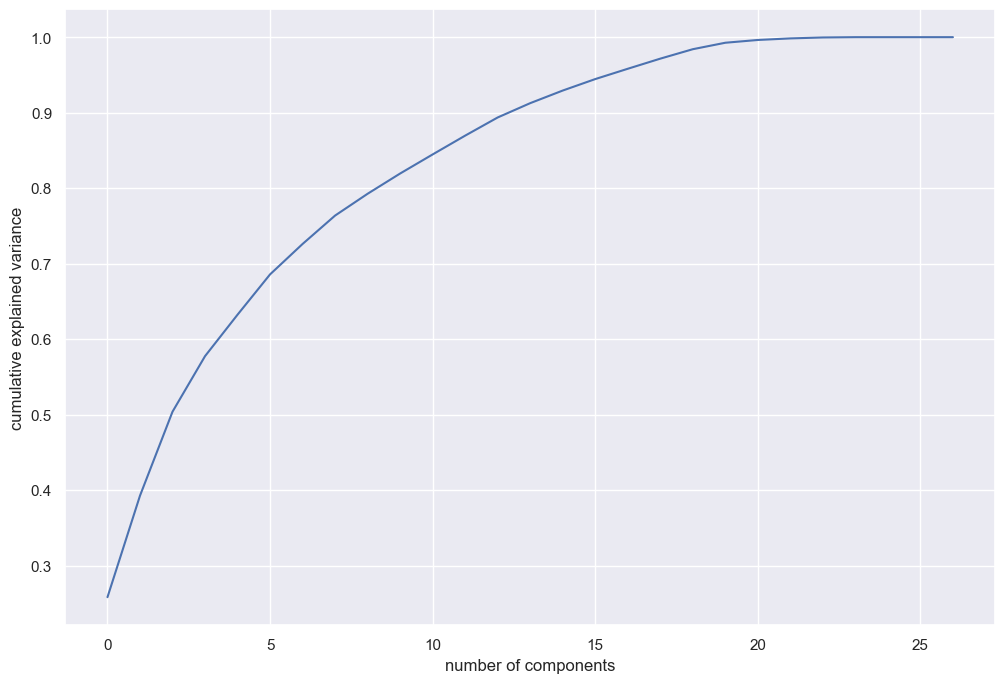

In [73]:
import numpy as np
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [74]:
variance_cum = np.cumsum(pca.explained_variance_ratio_)
variance_cum[18] 

0.9840516043618553

PCA SELECTION 98% VARIANCE IS CONTRIBUTED BY 18 PCA

In [75]:
pca2 = PCA(n_components=18,random_state=100)
X_pca2 = pca2.fit_transform(X)
X_test_final_pca2 = pca2.transform(X_test_final)


In [76]:
print(X_pca2.shape)
print(X_test_final_pca2.shape)

(69999, 18)
(30000, 18)


In [77]:
corrmat = np.corrcoef(X_pca2.transpose())

<AxesSubplot: >

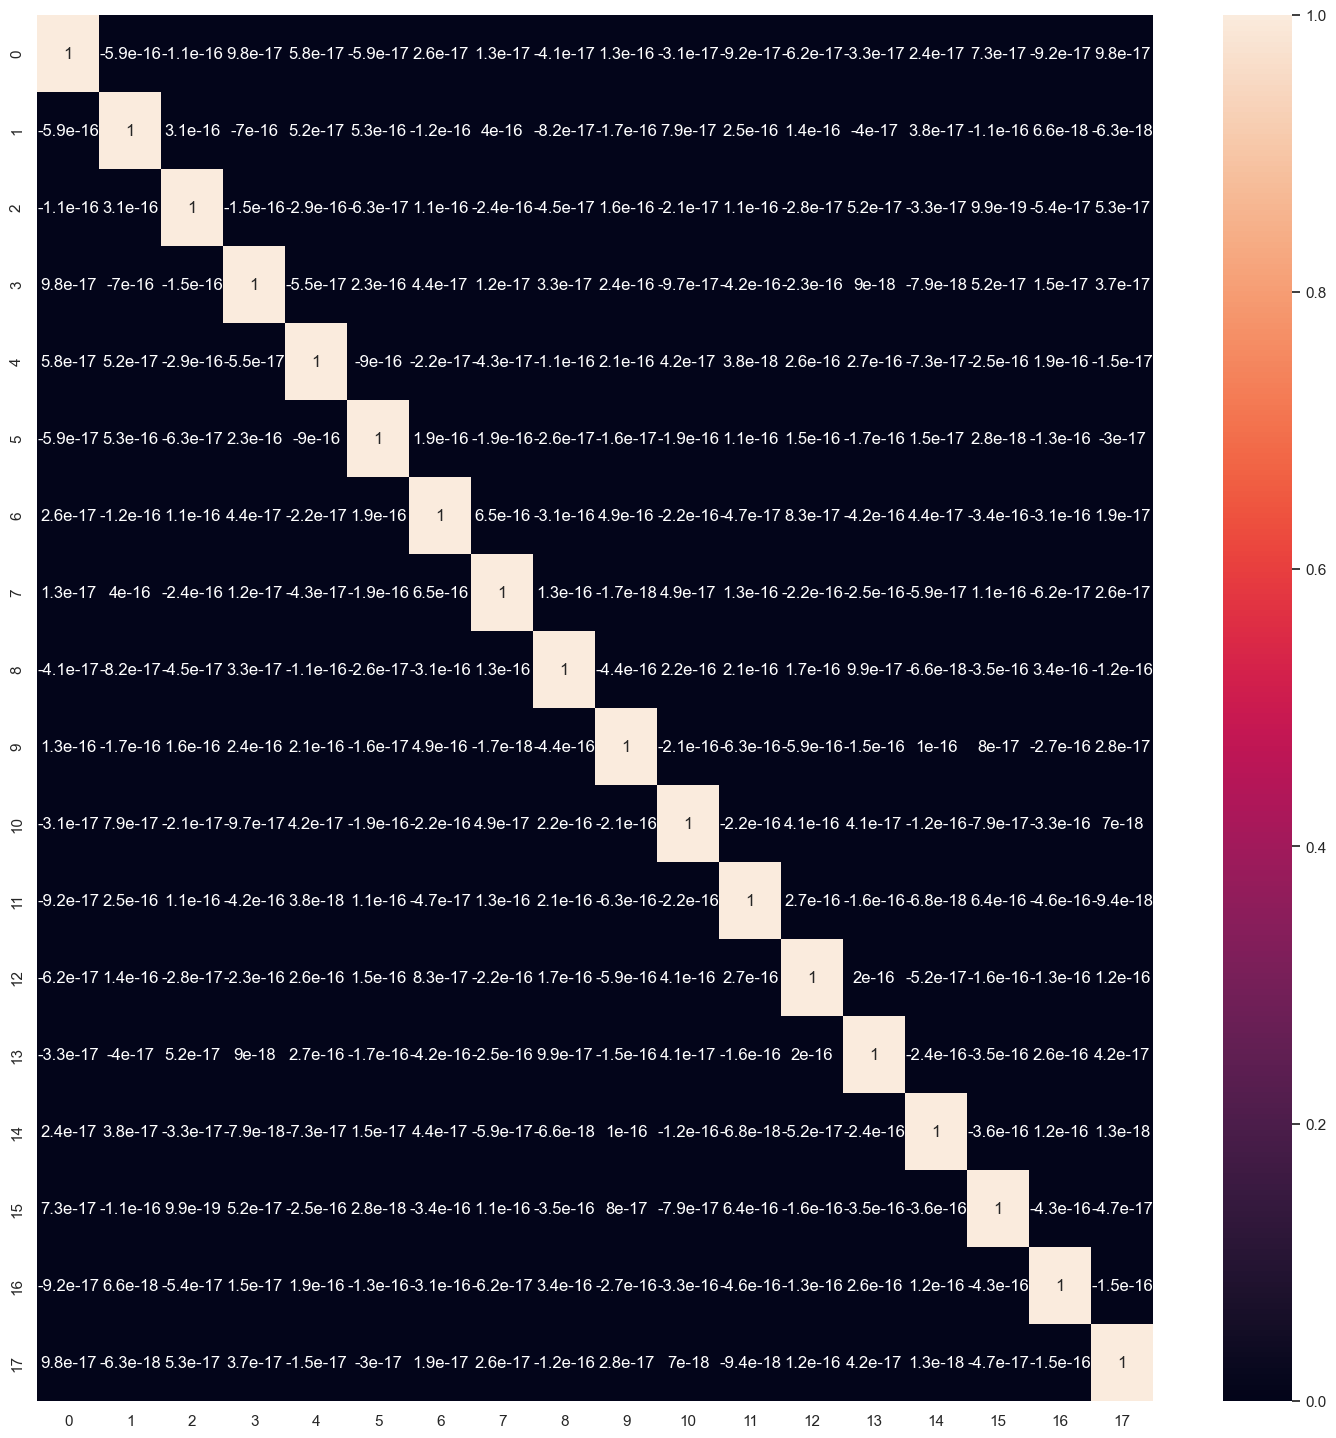

In [78]:
plt.figure(figsize=[18,18])
sns.heatmap(corrmat, annot=True)

# STEP4
Model Selection, Model Building, and  Prediction :
Identifying the type of problem and making a list of decisive models from all available choices
Choosing a training mechanism; for e.g., cross-validation, etc., and tuning hyperparameters of each model
Testing each model on the respective model evaluation metric
Choosing the best model based on the fit of the data set and output variable
Using ensemble options to improve the efficacy based on the evaluation metric stated in the problem

LOGISTIC REGRESSION

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score,precision_score ,f1_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold

In [80]:
learner_pca = LogisticRegression()

In [81]:
model_pca = learner_pca.fit(X_pca2,y)

In [82]:
pred_probs_test_final = model_pca.predict_proba(X_test_final_pca2)

In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_test_final, pred_probs_test_final[:,1]))

In [ ]:
ypred_pca2=model_pca.predict(X_pca2)
print("Train Accuracy :%.4f" % accuracy_score(y, ypred_pca2))
print("Train ROC/AUC: %.4f" % roc_auc_score(y, ypred_pca2))
print("Train Precision Score: %.4f" % precision_score(y, ypred_pca2))
print("Train Recall Score: %.4f" % recall_score(y, ypred_pca2))
print("Train F1 Score: %.4f" % f1_score(y, ypred_pca2))

print("Train Confusion Matix is:")
print(confusion_matrix(y, ypred_pca2))
print("---"*20)


ypred_final_pca2=model_pca.predict(X_test_final_pca2)

print("Test Accuracy :%.4f" % accuracy_score(y_test_final, ypred_final_pca2))
print("Test ROC/AUC: %.4f" % roc_auc_score(y_test_final, ypred_final_pca2))
print("Test Precision Score: %.4f" % precision_score(y_test_final, ypred_final_pca2))
print("Test Recall Score: %.4f" % recall_score(y_test_final, ypred_final_pca2))
print("Test F1 Score: %.4f" % f1_score(y_test_final, ypred_final_pca2))
print("Test Confusion Matrix is :")
print(confusion_matrix(y_test_final, ypred_final_pca2))

RANDOM FOREST

In [ ]:
model_rf = RandomForestClassifier()

In [ ]:
model_rf.fit(X_pca2,y)

In [ ]:
y_test_pred = model_rf.predict(X_test_final_pca2)

In [ ]:
metrics.accuracy_score(y_test_final,y_test_pred)

In [ ]:
ypred_rf=model_rf.predict(X_test_final_pca2)
print("Test Accuracy :%.4f" % accuracy_score(y_test_final, ypred_rf))
print("Test ROC/AUC: %.4f" % roc_auc_score(y_test_final, ypred_rf))
print("Test Precision Score: %.4f" % precision_score(y_test_final, ypred_rf))
print("Test Recall Score: %.4f" % recall_score(y_test_final, ypred_rf))
print("Test F1 Score: %.4f" % f1_score(y_test_final, ypred_rf))
print("Test Confusion Matrix is :")
print(confusion_matrix(y_test_final,ypred_rf))

XGBOOST

In [ ]:
folds = 3
param_comb = 10
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 100)
params = {'max_depth':[3,5,7,9],
          'n_estimators':[300,400,500,600],
          'learning_rate':[0.1,0.2,0.3,0.4]
         }
classifier_xg=xgb.XGBClassifier(n_jobs=-1,
                                verbosity=1,
                                gpu_id=-1)
random_search = RandomizedSearchCV(classifier_xg,
                                   param_distributions=params,
                                   n_iter=param_comb, 
                                   scoring='roc_auc',
                                   n_jobs=-1,
                                   cv=skf.split(X_pca2,y),
                                   verbose=3,
                                   random_state=100)

random_search.fit(X_pca2,y)

xg_boost_final =random_search.best_estimator_

In [ ]:
xg_boost_final

In [ ]:
ypred_xg=xg_boost_final.predict(X_pca2)
print("Train Accuracy :%.4f" % accuracy_score(y, ypred_xg))
print("Train ROC/AUC: %.4f" % roc_auc_score(y, ypred_xg))
print("Train Precision Score: %.4f" % precision_score(y, ypred_xg))
print("Train Recall Score: %.4f" % recall_score(y, ypred_xg))
print("Train F1 Score: %.4f" % f1_score(y, ypred_xg))
print("Train Confusion Matix is:")
print(confusion_matrix(y, ypred_xg))
print("---"*20)


ypred_final_xg=xg_boost_final.predict(X_test_final_pca2)

print("Test Accuracy :%.4f" % accuracy_score(y_test_final, ypred_final_xg))
print("Test ROC/AUC: %.4f" % roc_auc_score(y_test_final, ypred_final_xg))
print("Test Precision Score: %.4f" % precision_score(y_test_final, ypred_final_xg))
print("Test Recall Score: %.4f" % recall_score(y_test_final, ypred_final_xg))
print("Test F1 Score: %.4f" % f1_score(y_test_final, ypred_final_xg))
print("Test Confusion Matrix is :")
print(confusion_matrix(y_test_final, ypred_final_xg))


# INFERENCES AND RECOMMENDATIONS
FOLLOWING COORELATED MATRICES HAVE HIGH IMPACT ON CHURN
total_ic_mou_8 -0.19 
total_rech_num_8 -0.17 
total_rech_amt_8 -0.16 
max_rech_amt_8 -0.16 
arpu_8 -0.16 total_og_mou_8 -0.15 
last_day_rch_amt_8 -0.14 aon -0.14 
loc_ic_mou_8 -0.13 
loc_ic_t2m_mou_8 -0.12 
total_ic_mou_7 -0.12 
loc_og_t2m_mou_8 -0.11 
loc_og_mou_8 -0.11 
loc_ic_t2m_mou_7 -0.10 
loc_ic_mou_7 -0.10 
loc_og_t2m_mou_7 -0.09 
loc_og_mou_7 -0.09 
monthly_2g_8 -0.08 
max_rech_amt_7 -0.07 
offnet_mou_8 -0.07 
sachet_2g_8 -0.07 
total_ic_mou_6 -0.07 
loc_ic_mou_6 -0.07 
last_day_rch_amt_7 -0.07 
loc_ic_t2m_mou_6 -0.07

XGBOOST IS VERY MUCH USEFUL IN ACCURATE PREDICTION OF CHURN OUTCOMES


SOLUTION FILES

In [ ]:
churn1=pd.DataFrame(ypred_final_xg,columns=['churn_probability'])

In [ ]:
churn1['churn_probability'].value_counts()

In [ ]:
df_output=pd.concat([df_output,pd.DataFrame(ypred_final_xg,columns=['churn_probability'])],axis=1)


In [ ]:
churn_output['churn_probability']=df_output['churn_probability'].astype('int')

In [ ]:
df_output.to_csv('solutions.csv',index=False)